# Malicious URLs Dataset Preprocessing

In [28]:
import pandas as pd
import numpy as np

In [3]:
# reading dataset 'Malicious-URLs'

df = pd.read_csv('Malicious-URLs.csv')
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


### Grouping all malicious categories into a common category

In [4]:
type_dict = {'phishing': 1, 'defacement': 1, 'malware': 1, 'benign': 0}
df.replace({'type': type_dict}, inplace = True)

df.head()

,url,type
0,br-icloud.com.br,1
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=...,1
4,http://adventure-nicaragua.net/index.php?optio...,1


In [5]:
df.describe()

,type
count,651191.000000
mean,0.342585
std,0.474574
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Imbalanced data

In [6]:
# getting count of labels - benign (0) and malicious (1)
df.groupby('type').count()

,url
type,
0,428103
1,223088


Text(0, 0.5, 'Count')

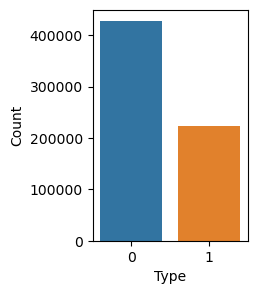

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt

count = df.type.value_counts()

plt.figure(figsize=(2,3))
sn.barplot(x=count.index, y=count)
plt.xlabel('Type')
plt.ylabel('Count')

### Extracting Special Characters count and important parts of the URL

In [8]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits += 1
    return digits

def char_count(url):
    chars = 0
    for i in url:
        if i.isalpha():
            chars += 1
    return chars

# URL Length
df['url_length'] = df['url'].apply(lambda x: len(str(x)))

# Special characters
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    df[a+'_count'] = df['url'].apply(lambda i: i.count(a))
    

# Existence of HTTPS/HTTP
df['https'] = np.where('https' in df['url'], 1, 0)

# Digit count
df['digit_count'] = df['url'].apply(lambda x: digit_count(x))

# Char count
df['char_count'] = df['url'].apply(lambda x: char_count(x))

# Get Tokens
def getTokens(url):
    url = url.lower()
    url = url.replace(' ', '/')
    url = url.replace('.', '/')
    url = url.replace('=', '/')
    url = url.replace('&', '/')
    url = url.replace('?', '/')
    url = url.replace('-', '/')
    url = url.replace('@', '/')
    url = url.replace(':', '/')
    url = url.replace(';', '/')
    url = url.replace('%2f', '/')
    url = url.replace('%', '/')
    url = url.replace('+', '/')
    url = url.replace('$', '/')
    url = url.replace('#', '/')
    url = url.replace('~', '/')
    url = url.replace(',', '/')
    url = url.replace('(', '/')
    url = url.replace(')', '/')
    url = url.replace('[', '/')
    url = url.replace(']', '/')
    url = url.replace('{', '/')
    url = url.replace('}', '/')
    url = url.replace('_', '/')
    url = url.replace('!', '/')
    url = url.replace('*', '/')
    url = url.replace("'", '/')
    url = url.replace('|', '/')
    url = url.replace('>', '/')
    url = url.replace('<', '/')
    url = url.replace('\\', '/')
    urls = url.split('/')
    urls = list(filter(lambda a: a != ' ' and a != '', urls))
    urls = list([str(u) for u in urls])
    return urls

df['url'] = df['url'].apply(lambda x : str(x))
df['url_tokens'] = df['url'].apply(lambda x: getTokens(x))

df.head()

,url,type,url_length,@_count,?_count,-_count,=_count,._count,#_count,%_count,+_count,$_count,!_count,*_count,",_count",//_count,https,digit_count,char_count,url_tokens
0,br-icloud.com.br,1,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,13,"[br, icloud, com, br]"
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,29,"[mp3raid, com, music, krizz, kaliko, html]"
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,25,"[bopsecrets, org, rexroth, cr, 1, htm]"
3,http://www.garage-pirenne.be/index.php?option=...,1,88,0,1,1,4,3,0,0,0,0,0,0,0,1,0,7,63,"[http, www, garage, pirenne, be, index, php, o..."
4,http://adventure-nicaragua.net/index.php?optio...,1,235,0,1,1,3,2,0,0,0,0,0,0,0,1,0,22,199,"[http, adventure, nicaragua, net, index, php, ..."


### Histogram on URL Length frequency for Benign and Malicious URLs

Text(0.5, 0, 'URL Length')

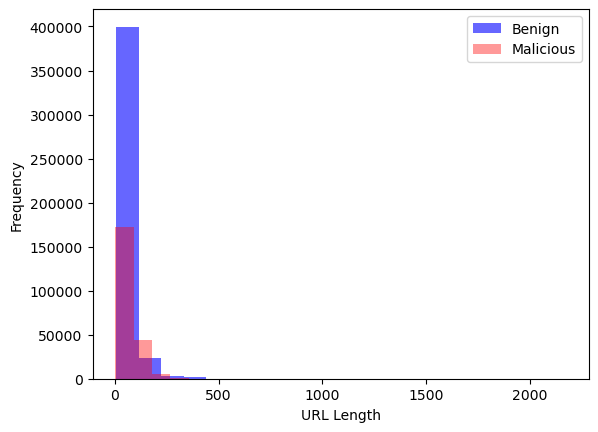

In [9]:
df[df.type==0].url_length.plot(
    bins=20, kind='hist', color='blue', 
    label='Benign', alpha=0.6)
df[df.type==1].url_length.plot(bins=20,
    kind='hist', color='red', 
    label='Malicious', alpha=0.4)

plt.legend()
plt.xlabel("URL Length")

### Comparing the different special character count features

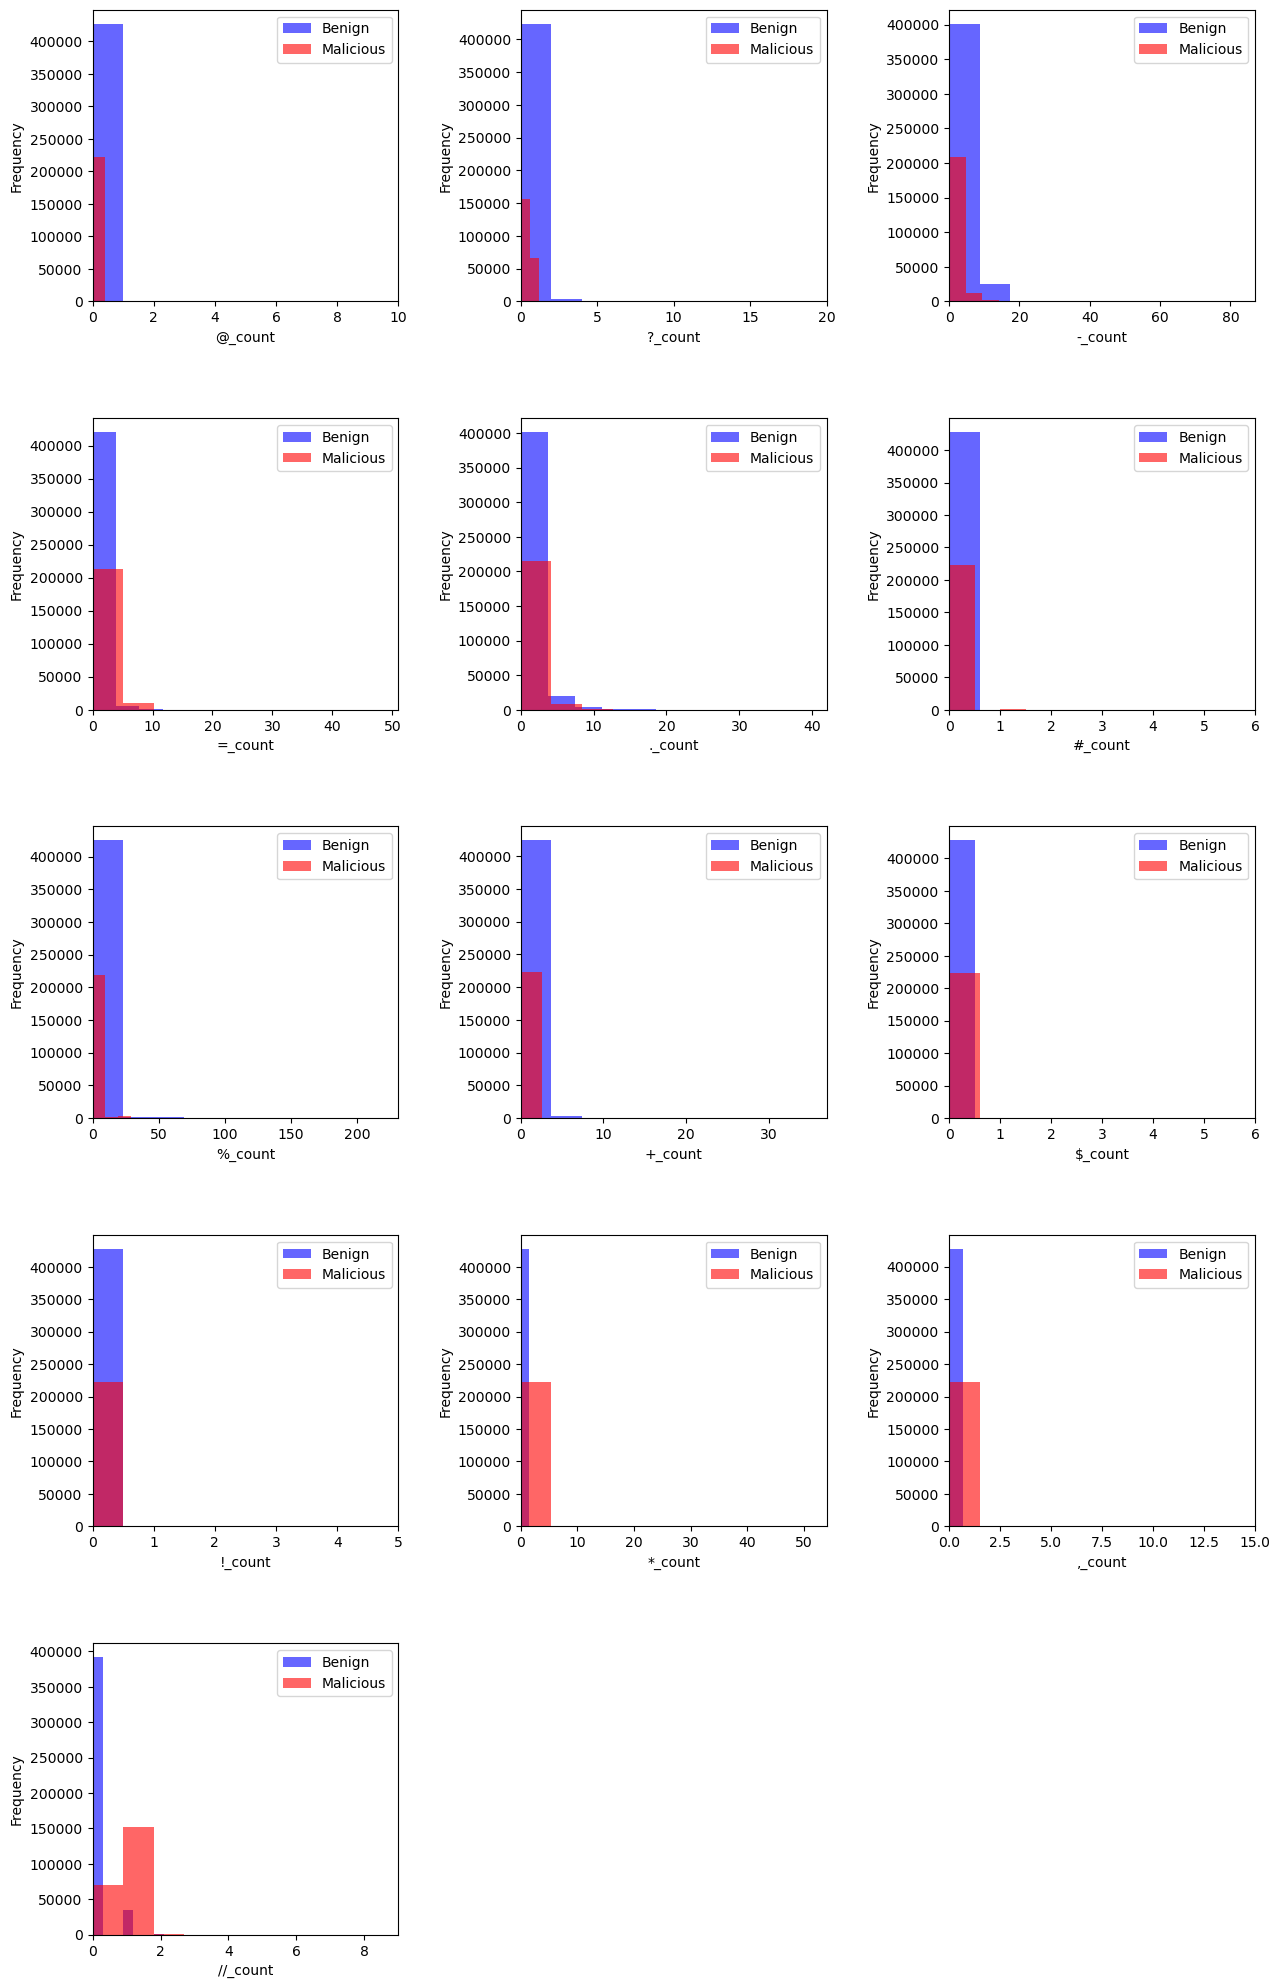

In [10]:
x = []
xlim = [10, 20, 87, 51, 42, 6, 231, 37, 6, 5, 54, 15, 9]
for a in feature:
    x.append(a + '_count')
    
count = 0
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(4):
    for j in range(3):
        axes[i,j].hist(df[df.type==0][x[count]], color='blue', alpha=0.6, label='Benign')
        axes[i,j].hist(df[df.type==1][x[count]], color='red', alpha=0.6, label='Malicious')
        axes[i,j].set_xlabel(x[count])
        axes[i,j].set_ylabel('Frequency')
        axes[i,j].set_xlim([0,xlim[count]])
        axes[i,j].legend()
        count += 1
        
axes[4,0].hist(df[df.type==0][x[count]], color='blue', alpha=0.6, label='Benign')
axes[4,0].hist(df[df.type==1][x[count]], color='red', alpha=0.6, label='Malicious')
axes[4,0].set_xlabel(x[count])
axes[4,0].set_ylabel('Frequency')
axes[4,0].set_xlim([0,xlim[count]])
axes[4,0].legend()

fig.delaxes(axes[4,1])
fig.delaxes(axes[4,2])

plt.show()

## Inferences
- Malicious URLs have a greater URL length


- Malicious URLs tend to have a greater **//** count


- Malicious URLs tend to have a greater **=** count


- Benign URLs tend to have a greater **?** count


- Benign URLs tend to have a greater **-** count

In [11]:
df[df['url_tokens'].str.len() == 0]

,url,type,url_length,@_count,?_count,-_count,=_count,._count,#_count,%_count,+_count,$_count,!_count,*_count,",_count",//_count,https,digit_count,char_count,url_tokens


Text(0.5, 0, 'URL Tokens')

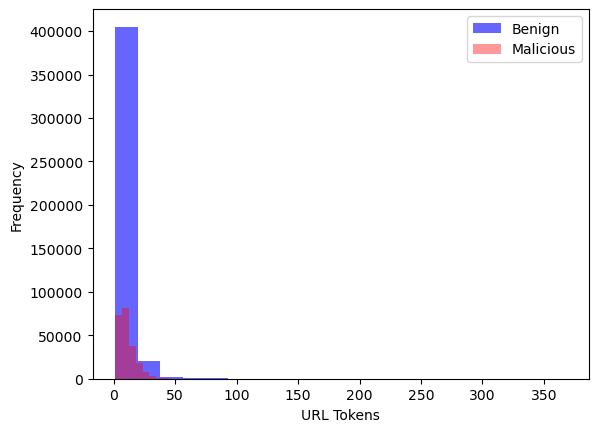

In [12]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
df[df.type==0]['url_tokens'].str.len().plot(
    bins=20, kind='hist', color='blue', 
    label='Benign', alpha=0.6)
df[df.type==1]['url_tokens'].str.len().plot(bins=20,
    kind='hist', color='red', 
    label='Malicious', alpha=0.4)

plt.legend()
plt.xlabel("URL Tokens")

### Applying Word2vec

In [13]:
from gensim.models import Word2Vec

w2vmodel = Word2Vec(vector_size=300, min_count=1, window=5, workers=4)
w2vmodel.build_vocab(df['url_tokens'])
w2vmodel.train(df['url_tokens'], total_examples=w2vmodel.corpus_count, epochs=2)

(10052488, 12173416)

In [14]:
count = 0
vectors = []
for word in w2vmodel.wv.key_to_index:
    index = w2vmodel.wv.key_to_index[word]
    vectors.append(w2vmodel.wv[index])

vectors[:3]

[array([ 4.10043657e-01,  1.25074446e-01,  1.65323675e-01,  3.81955773e-01,
         1.33348966e+00, -1.16951573e+00, -2.35061795e-01,  7.59960353e-01,
        -8.24103951e-01,  1.67647898e+00,  1.08800447e+00, -5.48761606e-01,
         6.07839562e-02,  1.90703833e+00,  8.24479342e-01, -1.38414419e+00,
         2.75615126e-01,  1.55047762e+00, -3.03716928e-01, -4.28388298e-01,
         2.12791848e+00,  5.03463686e-01,  6.90596342e-01,  2.82523423e-01,
         1.31947768e+00, -9.74767096e-03,  2.52157778e-01, -6.08021617e-01,
        -1.73797667e-01, -1.06142271e+00,  8.03512990e-01,  3.62384319e-01,
         3.42811167e-01,  1.74581885e+00,  4.14373279e-01, -3.13131064e-01,
         1.40883207e-01,  2.44192198e-01, -2.32054621e-01,  2.45990351e-01,
        -5.87888598e-01,  4.97617200e-02,  1.14641500e+00,  2.07608402e-01,
        -1.23789597e+00,  1.98949408e-02, -6.06626153e-01,  1.23101282e+00,
        -6.84199572e-01,  4.35741901e-01,  3.34552109e-01, -4.49160874e-01,
        -6.8

### Getting the TFIDF Weights

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ' '.join([u for url in df['url_tokens'] for u in url])
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([corpus])

tfidf_dict = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.toarray()[0]))

In [17]:
tfidf_matrix.toarray()

array([[7.96035363e-04, 2.79219376e-04, 5.20284551e-05, ...,
        1.73428184e-06, 1.73428184e-06, 1.73428184e-06]])

In [29]:
words = vectorizer.get_feature_names_out()
scores = tfidf_matrix.toarray()[0]
d = {'Words': words, 'TFIDF Scores': scores}
tfidf_dataframe = pd.DataFrame(d)
tfidf_dataframe[tfidf_dataframe['Words']=='html']

,Words,TFIDF Scores
301889,html,0.200911


### Creating the Weighted Vector using TFIDF

- For each word in the corpus, we multiplied the corresponding word vector with its pre-calculated tfidf score

In [30]:
tfidf_weighted_vector = {}
errors = []
count = 0
for i in range(len(vectors)):
    try:
        v = vectors[i]
        word = w2vmodel.wv.index_to_key[i]
        tfidf = tfidf_dict[str(word)]
        tfidf_weighted_vector[word] = np.array(list(map(lambda e: e * tfidf, v)))
    except KeyError:
        tfidf_weighted_vector[word] = np.random.uniform(0,1,300)

In [31]:
tfidf_weighted_vector['html']

array([-0.29174881, -0.09634497,  0.07727044, -0.3074647 ,  0.30531121,
       -0.25274686, -0.03107868,  0.46472835,  0.10989767, -0.28495487,
        0.09220718,  0.21166476, -0.1207075 ,  0.06178782, -0.06583493,
        0.05065997, -0.113565  ,  0.04364567,  0.05288512, -0.15960131,
        0.22300267,  0.30142862,  0.07171421,  0.0933309 ,  0.33498162,
        0.02628215, -0.50278262,  0.05364221, -0.22318701, -0.4093295 ,
       -0.13431397,  0.30151774,  0.11413421, -0.10562866, -0.07675798,
        0.02826926,  0.09229821,  0.13805781, -0.19505077,  0.07998792,
        0.08357557,  0.08994837,  0.11151409, -0.26327416, -0.25374418,
        0.13904903,  0.05367119,  0.30833269, -0.01485727,  0.49804699,
       -0.04898454, -0.13717456, -0.24530515, -0.0630193 ,  0.24511314,
       -0.16132839, -0.10376517,  0.15657252,  0.33449734, -0.06191399,
        0.06225453,  0.0901832 ,  0.06631715,  0.12751803,  0.00729437,
       -0.01445059,  0.140451  , -0.06398988, -0.53698231, -0.11

### Creating paragraph vectors for each URL

- We created paragraph vectors by taking the average of every $word_i$ at $index_j$
![image info](ParagraphVector.png)

In [51]:
def create_paragraph_vectors(tokens):
    temp = []
    for i in range(300):
        sum = 0
        for token in tokens:
            try:
                sum += tfidf_weighted_vector[token][i]
            except KeyError as e:
                v = np.random.uniform(0,1,300)
                sum += v[i]
        temp.append(sum/len(tokens))
    paragraph_vector = np.asarray(temp, dtype=np.float32)
    return paragraph_vector

example_url = ['https', 'www', 'google', 'com']
res = create_paragraph_vectors(example_url)
res

array([-4.92610503e-03,  1.21764513e-02,  1.18118219e-01,  8.63629654e-02,
        4.16554958e-01, -2.82643944e-01, -3.21287438e-02,  1.87834144e-01,
       -1.15355417e-01,  3.86397094e-01,  3.12769383e-01, -1.39881402e-01,
       -9.01390985e-02,  3.64553720e-01,  1.87903121e-01, -3.69523644e-01,
        1.34618714e-01,  3.50106865e-01, -8.38532001e-02, -4.57684770e-02,
        4.51660544e-01,  2.28713095e-01,  2.08470851e-01,  1.92442104e-01,
        2.73926049e-01,  5.28150126e-02, -3.03170886e-02, -8.09849650e-02,
       -1.73958972e-01, -2.91797280e-01,  2.89035976e-01,  8.87162983e-02,
       -2.93479115e-02,  3.73009503e-01,  7.40674809e-02, -1.09674446e-01,
        6.64112046e-02,  7.76373819e-02, -3.80526967e-02,  7.07001835e-02,
       -2.76155882e-02, -8.63152370e-02,  2.46932551e-01, -1.02217533e-01,
       -2.81059980e-01,  1.94923691e-02,  5.83090261e-03,  2.55345613e-01,
       -1.98730290e-01,  1.60430193e-01,  6.20255508e-02, -1.57441393e-01,
       -1.08489066e-01,  

In [33]:
df['paragraph_vector'] = df['url_tokens'].apply(lambda x: create_paragraph_vectors(x))
df.head()

,url,type,url_length,@_count,?_count,-_count,=_count,._count,#_count,%_count,...,$_count,!_count,*_count,",_count",//_count,https,digit_count,char_count,url_tokens,paragraph_vector
0,br-icloud.com.br,1,16,0,0,1,0,2,0,0,...,0,0,0,0,0,0,0,13,"[br, icloud, com, br]","[0.076308414, 0.021195935, 0.033833966, 0.0935..."
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,0,0,0,2,0,0,...,0,0,0,0,0,0,1,29,"[mp3raid, com, music, krizz, kaliko, html]","[0.009284162, 0.0022627565, 0.03311744, 0.0025..."
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,0,0,0,2,0,0,...,0,0,0,0,0,0,1,25,"[bopsecrets, org, rexroth, cr, 1, htm]","[0.009985884, 0.069643475, 0.085026115, 0.1236..."
3,http://www.garage-pirenne.be/index.php?option=...,1,88,0,1,1,4,3,0,0,...,0,0,0,0,1,0,7,63,"[http, www, garage, pirenne, be, index, php, o...","[-0.0062911897, 0.09140753, 0.08587977, 0.0496..."
4,http://adventure-nicaragua.net/index.php?optio...,1,235,0,1,1,3,2,0,0,...,0,0,0,0,1,0,22,199,"[http, adventure, nicaragua, net, index, php, ...","[-0.013095673, 0.0646451, 0.049281314, 0.02135..."


### Generating Paragraph Vectors for every URL

In [34]:
new_df = df[['url', 'type', 'url_tokens', 'paragraph_vector']]
new_df.head()

,url,type,url_tokens,paragraph_vector
0,br-icloud.com.br,1,"[br, icloud, com, br]","[0.076308414, 0.021195935, 0.033833966, 0.0935..."
1,mp3raid.com/music/krizz_kaliko.html,0,"[mp3raid, com, music, krizz, kaliko, html]","[0.009284162, 0.0022627565, 0.03311744, 0.0025..."
2,bopsecrets.org/rexroth/cr/1.htm,0,"[bopsecrets, org, rexroth, cr, 1, htm]","[0.009985884, 0.069643475, 0.085026115, 0.1236..."
3,http://www.garage-pirenne.be/index.php?option=...,1,"[http, www, garage, pirenne, be, index, php, o...","[-0.0062911897, 0.09140753, 0.08587977, 0.0496..."
4,http://adventure-nicaragua.net/index.php?optio...,1,"[http, adventure, nicaragua, net, index, php, ...","[-0.013095673, 0.0646451, 0.049281314, 0.02135..."


In [35]:
cols = ['v'+str(i) for i in range(300)]
cols

['v0',
 'v1',
 'v2',
 'v3',
 'v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v23',
 'v24',
 'v25',
 'v26',
 'v27',
 'v28',
 'v29',
 'v30',
 'v31',
 'v32',
 'v33',
 'v34',
 'v35',
 'v36',
 'v37',
 'v38',
 'v39',
 'v40',
 'v41',
 'v42',
 'v43',
 'v44',
 'v45',
 'v46',
 'v47',
 'v48',
 'v49',
 'v50',
 'v51',
 'v52',
 'v53',
 'v54',
 'v55',
 'v56',
 'v57',
 'v58',
 'v59',
 'v60',
 'v61',
 'v62',
 'v63',
 'v64',
 'v65',
 'v66',
 'v67',
 'v68',
 'v69',
 'v70',
 'v71',
 'v72',
 'v73',
 'v74',
 'v75',
 'v76',
 'v77',
 'v78',
 'v79',
 'v80',
 'v81',
 'v82',
 'v83',
 'v84',
 'v85',
 'v86',
 'v87',
 'v88',
 'v89',
 'v90',
 'v91',
 'v92',
 'v93',
 'v94',
 'v95',
 'v96',
 'v97',
 'v98',
 'v99',
 'v100',
 'v101',
 'v102',
 'v103',
 'v104',
 'v105',
 'v106',
 'v107',
 'v108',
 'v109',
 'v110',
 'v111',
 'v112',
 'v113',
 'v114',
 'v115',
 'v116',
 'v117',
 'v118',
 'v119',
 'v120',
 'v121',
 'v122',
 'v

### Separating the vector

- We are separating the vector of 300 dimensions such that the new dataframe will have 300 columns of 1 element each instead of 1 column of 300 dimension vector

- This is so that we can apply oversampling techniques and produce more data

In [36]:
import warnings
warnings.filterwarnings('ignore')

new_df[cols] = pd.DataFrame(new_df['paragraph_vector'].to_list(), index=new_df.index)
new_df.head()

,url,type,url_tokens,paragraph_vector,v0,v1,v2,v3,v4,v5,...,v290,v291,v292,v293,v294,v295,v296,v297,v298,v299
0,br-icloud.com.br,1,"[br, icloud, com, br]","[0.076308414, 0.021195935, 0.033833966, 0.0935...",0.076308,0.021196,0.033834,0.093582,0.290362,-0.260556,...,0.168296,0.451551,-0.150698,0.154089,0.113955,0.243071,0.294299,0.169144,0.359376,0.338050
1,mp3raid.com/music/krizz_kaliko.html,0,"[mp3raid, com, music, krizz, kaliko, html]","[0.009284162, 0.0022627565, 0.03311744, 0.0025...",0.009284,0.002263,0.033117,0.002562,0.235574,-0.204698,...,0.109899,0.314772,-0.085375,0.126272,0.065680,0.152177,0.189002,0.122189,0.247046,0.229033
2,bopsecrets.org/rexroth/cr/1.htm,0,"[bopsecrets, org, rexroth, cr, 1, htm]","[0.009985884, 0.069643475, 0.085026115, 0.1236...",0.009986,0.069643,0.085026,0.123642,0.008717,-0.013212,...,0.128785,0.047781,0.002706,0.198072,0.071223,0.029356,0.037747,0.165201,0.066924,0.021948
3,http://www.garage-pirenne.be/index.php?option=...,1,"[http, www, garage, pirenne, be, index, php, o...","[-0.0062911897, 0.09140753, 0.08587977, 0.0496...",-0.006291,0.091408,0.085880,0.049694,0.256054,-0.117334,...,0.071585,0.233616,-0.096117,0.195681,0.064510,0.156808,0.276574,0.090768,0.255482,0.180923
4,http://adventure-nicaragua.net/index.php?optio...,1,"[http, adventure, nicaragua, net, index, php, ...","[-0.013095673, 0.0646451, 0.049281314, 0.02135...",-0.013096,0.064645,0.049281,0.021358,0.210214,-0.154090,...,0.057125,0.251330,-0.122018,0.163679,0.041548,0.116810,0.260037,0.071209,0.256389,0.150572


## Imbalanced Data

In [37]:
X = new_df.iloc[:, 4:]
Y = new_df['type']

In [38]:
X.shape

(651191, 300)

In [39]:
Y.shape

(651191,)

### Splitting the dataset into training and testing set

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(520952, 300)
(130239, 300)
(520952,)
(130239,)


### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logRegClf = LogisticRegression(random_state=0)
logRegClf.fit(X_train, Y_train)

Y_pred = logRegClf.predict(X_test)
score = accuracy_score(Y_test, Y_pred)
print(score)
print(classification_report(Y_test, Y_pred))

0.8907086203057456
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     85778
           1       0.89      0.77      0.83     44461

    accuracy                           0.89    130239
   macro avg       0.89      0.86      0.87    130239
weighted avg       0.89      0.89      0.89    130239



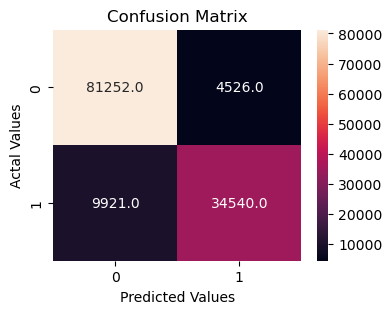

In [77]:
cmLR = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(4,3))
sn.heatmap(cmLR, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### KMeans

1
2
3
4
5
6
7
8
9
10


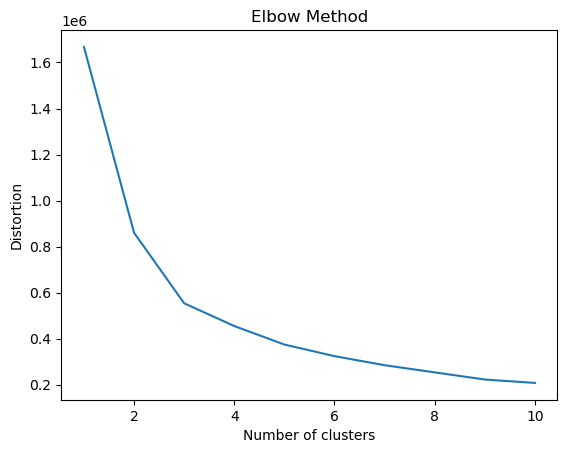

In [38]:
from sklearn.cluster import KMeans

# Elbow Method
distortions = []
for i in range(1, 11):
    print(i)
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [81]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
Y_kmeans_pred = kmeans.predict(X_test)
kmeans_score = accuracy_score(Y_test, Y_kmeans_pred)
print(kmeans_score)
print(classification_report(Y_test, Y_kmeans_pred))

0.5644238668908699
              precision    recall  f1-score   support

           0       0.65      0.73      0.69     85778
           1       0.32      0.24      0.27     44461

    accuracy                           0.56    130239
   macro avg       0.48      0.49      0.48    130239
weighted avg       0.54      0.56      0.55    130239



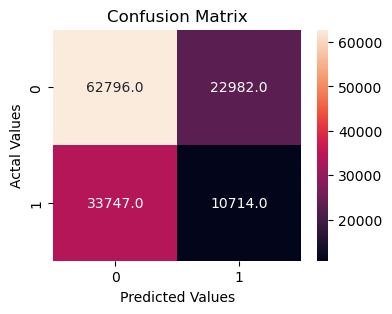

In [82]:
cmKM = confusion_matrix(Y_test, Y_kmeans_pred)
plt.figure(figsize=(4,3))
sn.heatmap(cmKM, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Cat Boost Classifier

In [42]:
from catboost import CatBoostClassifier

cbmodel = CatBoostClassifier()
cbmodel.fit(X_train, Y_train)

Y_cb_pred = cbmodel.predict(X_test)

Learning rate set to 0.148938
0:	learn: 0.5561910	total: 953ms	remaining: 15m 52s
1:	learn: 0.4603767	total: 1.79s	remaining: 14m 51s
2:	learn: 0.4075321	total: 2.4s	remaining: 13m 19s
3:	learn: 0.3709861	total: 3.2s	remaining: 13m 16s
4:	learn: 0.3390477	total: 3.95s	remaining: 13m 6s
5:	learn: 0.3200635	total: 4.83s	remaining: 13m 20s
6:	learn: 0.3061758	total: 5.52s	remaining: 13m 3s
7:	learn: 0.2936456	total: 6.28s	remaining: 12m 59s
8:	learn: 0.2842911	total: 6.98s	remaining: 12m 48s
9:	learn: 0.2785501	total: 7.49s	remaining: 12m 21s
10:	learn: 0.2721022	total: 8.24s	remaining: 12m 21s
11:	learn: 0.2685546	total: 8.82s	remaining: 12m 6s
12:	learn: 0.2650651	total: 9.38s	remaining: 11m 52s
13:	learn: 0.2604950	total: 10.3s	remaining: 12m 5s
14:	learn: 0.2575345	total: 11s	remaining: 11m 59s
15:	learn: 0.2542145	total: 11.8s	remaining: 12m 5s
16:	learn: 0.2518703	total: 12.5s	remaining: 12m 2s
17:	learn: 0.2496860	total: 13.2s	remaining: 12m
18:	learn: 0.2475990	total: 13.9s	remain

155:	learn: 0.1830738	total: 1m 43s	remaining: 9m 22s
156:	learn: 0.1829919	total: 1m 44s	remaining: 9m 20s
157:	learn: 0.1828526	total: 1m 44s	remaining: 9m 19s
158:	learn: 0.1827489	total: 1m 45s	remaining: 9m 17s
159:	learn: 0.1825781	total: 1m 45s	remaining: 9m 16s
160:	learn: 0.1823423	total: 1m 46s	remaining: 9m 15s
161:	learn: 0.1821272	total: 1m 47s	remaining: 9m 15s
162:	learn: 0.1819481	total: 1m 48s	remaining: 9m 14s
163:	learn: 0.1818330	total: 1m 48s	remaining: 9m 13s
164:	learn: 0.1817225	total: 1m 49s	remaining: 9m 12s
165:	learn: 0.1815919	total: 1m 49s	remaining: 9m 11s
166:	learn: 0.1814687	total: 1m 50s	remaining: 9m 10s
167:	learn: 0.1812307	total: 1m 50s	remaining: 9m 9s
168:	learn: 0.1810762	total: 1m 51s	remaining: 9m 8s
169:	learn: 0.1808285	total: 1m 52s	remaining: 9m 8s
170:	learn: 0.1805395	total: 1m 53s	remaining: 9m 8s
171:	learn: 0.1803153	total: 1m 53s	remaining: 9m 8s
172:	learn: 0.1801387	total: 1m 54s	remaining: 9m 7s
173:	learn: 0.1799553	total: 1m 55

309:	learn: 0.1633942	total: 3m 26s	remaining: 7m 39s
310:	learn: 0.1633346	total: 3m 27s	remaining: 7m 38s
311:	learn: 0.1631837	total: 3m 27s	remaining: 7m 38s
312:	learn: 0.1631113	total: 3m 28s	remaining: 7m 37s
313:	learn: 0.1630288	total: 3m 28s	remaining: 7m 36s
314:	learn: 0.1629167	total: 3m 29s	remaining: 7m 35s
315:	learn: 0.1628477	total: 3m 30s	remaining: 7m 34s
316:	learn: 0.1627763	total: 3m 30s	remaining: 7m 33s
317:	learn: 0.1626405	total: 3m 31s	remaining: 7m 33s
318:	learn: 0.1625659	total: 3m 31s	remaining: 7m 32s
319:	learn: 0.1624419	total: 3m 32s	remaining: 7m 31s
320:	learn: 0.1623566	total: 3m 33s	remaining: 7m 31s
321:	learn: 0.1621884	total: 3m 34s	remaining: 7m 31s
322:	learn: 0.1620790	total: 3m 35s	remaining: 7m 30s
323:	learn: 0.1619769	total: 3m 35s	remaining: 7m 30s
324:	learn: 0.1619281	total: 3m 36s	remaining: 7m 29s
325:	learn: 0.1618144	total: 3m 37s	remaining: 7m 28s
326:	learn: 0.1617038	total: 3m 37s	remaining: 7m 27s
327:	learn: 0.1616712	total:

463:	learn: 0.1525098	total: 5m 11s	remaining: 6m
464:	learn: 0.1524218	total: 5m 12s	remaining: 5m 59s
465:	learn: 0.1523554	total: 5m 13s	remaining: 5m 59s
466:	learn: 0.1523128	total: 5m 14s	remaining: 5m 58s
467:	learn: 0.1522768	total: 5m 14s	remaining: 5m 57s
468:	learn: 0.1522021	total: 5m 15s	remaining: 5m 57s
469:	learn: 0.1521405	total: 5m 16s	remaining: 5m 56s
470:	learn: 0.1520732	total: 5m 16s	remaining: 5m 55s
471:	learn: 0.1520451	total: 5m 17s	remaining: 5m 55s
472:	learn: 0.1520113	total: 5m 18s	remaining: 5m 54s
473:	learn: 0.1519674	total: 5m 18s	remaining: 5m 53s
474:	learn: 0.1519291	total: 5m 19s	remaining: 5m 53s
475:	learn: 0.1518801	total: 5m 20s	remaining: 5m 52s
476:	learn: 0.1518092	total: 5m 20s	remaining: 5m 51s
477:	learn: 0.1517263	total: 5m 21s	remaining: 5m 51s
478:	learn: 0.1516815	total: 5m 22s	remaining: 5m 50s
479:	learn: 0.1516490	total: 5m 22s	remaining: 5m 49s
480:	learn: 0.1515985	total: 5m 23s	remaining: 5m 48s
481:	learn: 0.1515542	total: 5m 

616:	learn: 0.1451192	total: 6m 53s	remaining: 4m 16s
617:	learn: 0.1450853	total: 6m 54s	remaining: 4m 16s
618:	learn: 0.1450573	total: 6m 55s	remaining: 4m 15s
619:	learn: 0.1450202	total: 6m 55s	remaining: 4m 14s
620:	learn: 0.1449771	total: 6m 56s	remaining: 4m 14s
621:	learn: 0.1449204	total: 6m 57s	remaining: 4m 13s
622:	learn: 0.1448973	total: 6m 57s	remaining: 4m 12s
623:	learn: 0.1448582	total: 6m 58s	remaining: 4m 12s
624:	learn: 0.1448234	total: 6m 59s	remaining: 4m 11s
625:	learn: 0.1447894	total: 6m 59s	remaining: 4m 10s
626:	learn: 0.1447369	total: 7m	remaining: 4m 10s
627:	learn: 0.1446968	total: 7m 1s	remaining: 4m 9s
628:	learn: 0.1446494	total: 7m 1s	remaining: 4m 8s
629:	learn: 0.1446203	total: 7m 2s	remaining: 4m 7s
630:	learn: 0.1445847	total: 7m 2s	remaining: 4m 7s
631:	learn: 0.1445605	total: 7m 3s	remaining: 4m 6s
632:	learn: 0.1445167	total: 7m 4s	remaining: 4m 5s
633:	learn: 0.1444618	total: 7m 4s	remaining: 4m 5s
634:	learn: 0.1444258	total: 7m 5s	remaining: 

770:	learn: 0.1395655	total: 8m 27s	remaining: 2m 30s
771:	learn: 0.1395358	total: 8m 27s	remaining: 2m 29s
772:	learn: 0.1395198	total: 8m 28s	remaining: 2m 29s
773:	learn: 0.1394932	total: 8m 29s	remaining: 2m 28s
774:	learn: 0.1394645	total: 8m 30s	remaining: 2m 28s
775:	learn: 0.1394038	total: 8m 30s	remaining: 2m 27s
776:	learn: 0.1393831	total: 8m 31s	remaining: 2m 26s
777:	learn: 0.1393325	total: 8m 31s	remaining: 2m 26s
778:	learn: 0.1393088	total: 8m 32s	remaining: 2m 25s
779:	learn: 0.1392876	total: 8m 33s	remaining: 2m 24s
780:	learn: 0.1392580	total: 8m 33s	remaining: 2m 24s
781:	learn: 0.1392334	total: 8m 34s	remaining: 2m 23s
782:	learn: 0.1392057	total: 8m 35s	remaining: 2m 22s
783:	learn: 0.1391868	total: 8m 35s	remaining: 2m 22s
784:	learn: 0.1391603	total: 8m 36s	remaining: 2m 21s
785:	learn: 0.1391388	total: 8m 37s	remaining: 2m 20s
786:	learn: 0.1391189	total: 8m 37s	remaining: 2m 20s
787:	learn: 0.1390644	total: 8m 38s	remaining: 2m 19s
788:	learn: 0.1390133	total:

924:	learn: 0.1347363	total: 10m 9s	remaining: 49.4s
925:	learn: 0.1347132	total: 10m 10s	remaining: 48.8s
926:	learn: 0.1346870	total: 10m 11s	remaining: 48.1s
927:	learn: 0.1346574	total: 10m 11s	remaining: 47.5s
928:	learn: 0.1346355	total: 10m 12s	remaining: 46.8s
929:	learn: 0.1346165	total: 10m 12s	remaining: 46.1s
930:	learn: 0.1345591	total: 10m 13s	remaining: 45.5s
931:	learn: 0.1345234	total: 10m 14s	remaining: 44.8s
932:	learn: 0.1344899	total: 10m 14s	remaining: 44.1s
933:	learn: 0.1344689	total: 10m 15s	remaining: 43.5s
934:	learn: 0.1344466	total: 10m 15s	remaining: 42.8s
935:	learn: 0.1343990	total: 10m 16s	remaining: 42.2s
936:	learn: 0.1343882	total: 10m 17s	remaining: 41.5s
937:	learn: 0.1343647	total: 10m 17s	remaining: 40.8s
938:	learn: 0.1343364	total: 10m 18s	remaining: 40.2s
939:	learn: 0.1343145	total: 10m 18s	remaining: 39.5s
940:	learn: 0.1342815	total: 10m 19s	remaining: 38.8s
941:	learn: 0.1342520	total: 10m 20s	remaining: 38.2s
942:	learn: 0.1342339	total: 

In [79]:
cbscore = accuracy_score(Y_test, Y_cb_pred)
print(cbscore)
print(classification_report(Y_test, Y_cb_pred))

0.9464446133646603
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     85778
           1       0.96      0.88      0.92     44461

    accuracy                           0.95    130239
   macro avg       0.95      0.93      0.94    130239
weighted avg       0.95      0.95      0.95    130239



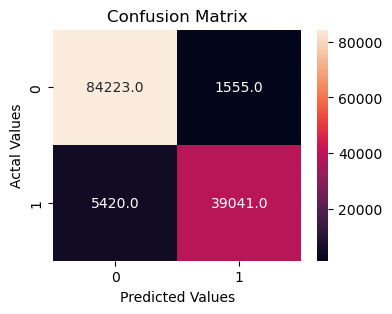

In [83]:
cmCB = confusion_matrix(Y_test, Y_cb_pred)
plt.figure(figsize=(4,3))
sn.heatmap(cmCB, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### CNN Model

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LeakyReLU, Dropout, MaxPool1D

In [75]:
X_cnn_train = X_train.values.reshape(520952, 300, 1)
X_cnn_train.shape

(520952, 300, 1)

In [76]:
X_cnn_test = X_test.values.reshape(130239, 300, 1)
X_cnn_test.shape

(130239, 300, 1)

In [115]:
cnnmodel = Sequential()
cnnmodel.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_cnn_train.shape[1],1)))
cnnmodel.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu'))
cnnmodel.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation='relu'))
cnnmodel.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnnmodel.add(Dropout(0.5))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(units = 256, activation=LeakyReLU(alpha=0.001)))
cnnmodel.add(Dense(units = 512, activation=LeakyReLU(alpha=0.001)))
cnnmodel.add(Dense(units = 2, activation='sigmoid'))

cnnmodel.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
cnnmodel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 300, 32)           128       
                                                                 
 conv1d_13 (Conv1D)          (None, 300, 64)           6208      
                                                                 
 conv1d_14 (Conv1D)          (None, 300, 128)          24704     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 150, 128)         0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 150, 128)          0         
                                                                 
 flatten_4 (Flatten)         (None, 19200)             0         
                                                      

In [97]:
cnnmodel_history = cnnmodel.fit(X_cnn_train, Y_train, epochs=5, batch_size = 100, validation_data = (X_cnn_test, Y_test))

Epoch 1/2
5210/5210 [==============================] - 820s 157ms/step - loss: 0.2105 - accuracy: 0.9232 - val_loss: 0.1961 - val_accuracy: 0.9287
Epoch 2/2
5210/5210 [==============================] - 906s 174ms/step - loss: 0.2079 - accuracy: 0.9242 - val_loss: 0.1939 - val_accuracy: 0.9294


4070/4070 [==============================] - 72s 18ms/step
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     85778
           1       0.94      0.85      0.89     44461

    accuracy                           0.93    130239
   macro avg       0.93      0.91      0.92    130239
weighted avg       0.93      0.93      0.93    130239



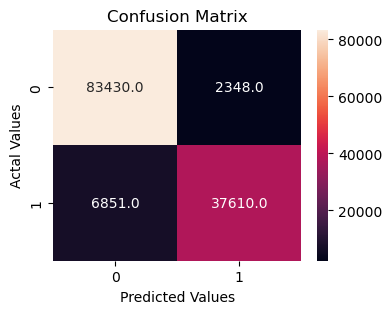

In [98]:
Y_cnn_pred = cnnmodel.predict(X_cnn_test)
Y_cnn_pred = np.argmax(Y_cnn_pred, axis=1)
print(classification_report(Y_test, Y_cnn_pred))

CM_CNN = confusion_matrix(Y_test, Y_cnn_pred)
plt.figure(figsize=(4,3))
sn.heatmap(CM_CNN, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

<!-- ### Summary:
- **Logistic Regression**: 0.8890731654880643

- **KMeans**: 0.46559786239144957

- **Cat Boosting**: 0.8890731654880643


For imbalanced data, LR and Cat Boosting gave the same results. -->

## Rebalancing using SMOTE

Text(0, 0.5, 'Count')

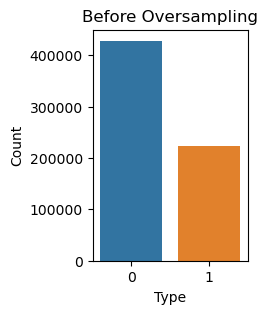

In [86]:
count_before = Y.value_counts()

plt.figure(figsize=(2,3))
sn.barplot(x=count_before.index, y=count_before)
plt.title('Before Oversampling')
plt.xlabel('Type')
plt.ylabel('Count')  

Text(0, 0.5, 'Count')

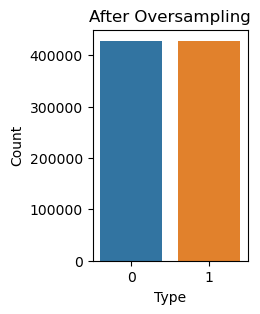

In [87]:
from imblearn.over_sampling import SMOTE

smote_oversample = SMOTE(random_state=2)
X_smote_oversampled, Y_smote_oversampled = smote_oversample.fit_resample(X, Y)

count = Y_smote_oversampled.value_counts()

plt.figure(figsize=(2,3))
sn.barplot(x=count.index, y=count)
plt.title('After Oversampling')
plt.xlabel('Type')
plt.ylabel('Count')                           

In [88]:
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(X_smote_oversampled, Y_smote_oversampled, test_size=0.2, random_state=42)

print(X_smote_train.shape)
print(X_smote_test.shape)
print(Y_smote_train.shape)
print(Y_smote_test.shape)

(684964, 300)
(171242, 300)
(684964,)
(171242,)


### Logistic Regression

In [47]:
logRegClfSM = LogisticRegression(random_state=0)
logRegClfSM.fit(X_smote_train, Y_smote_train)

Y_smote_pred_LR = logRegClfSM.predict(X_smote_test)
smote_LR_score = accuracy_score(Y_smote_test, Y_smote_pred_LR)
print(smote_LR_score)

0.8540019387767019


              precision    recall  f1-score   support

           0       0.83      0.90      0.86     85895
           1       0.89      0.81      0.85     85347

    accuracy                           0.85    171242
   macro avg       0.86      0.85      0.85    171242
weighted avg       0.86      0.85      0.85    171242



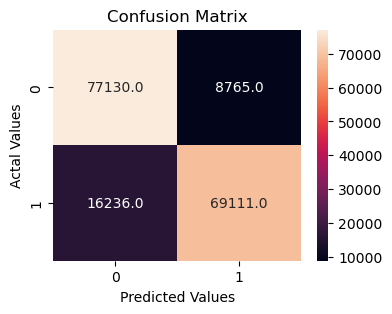

In [84]:
print(classification_report(Y_smote_test, Y_smote_pred_LR))
smote_cmLR = confusion_matrix(Y_smote_test, Y_smote_pred_LR)
plt.figure(figsize=(4,3))
sn.heatmap(smote_cmLR, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### KMeans

1
2
3
4
5
6
7
8
9
10


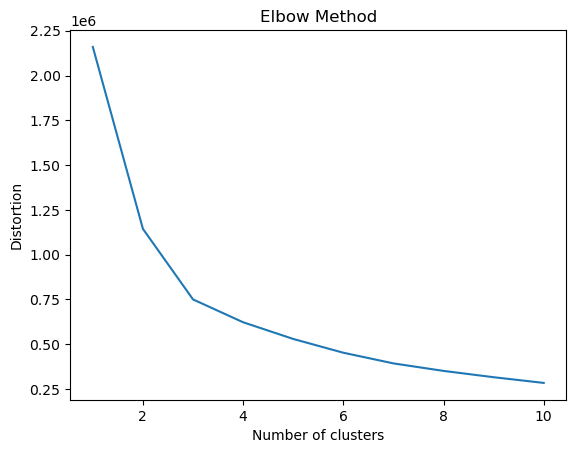

In [48]:
# Elbow Method
distortions = []
for i in range(1, 11):
    print(i)
    kmeansSM = KMeans(n_clusters=i, random_state=42)
    kmeansSM.fit(X_smote_train)
    distortions.append(kmeansSM.inertia_)

plt.plot(range(1, 11), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [85]:
kmeansSM = KMeans(n_clusters=2, random_state=42)
kmeansSM.fit(X_smote_train)
Y_kmeans_pred_SM = kmeansSM.predict(X_smote_test)
kmeans_smote_score = accuracy_score(Y_smote_test, Y_kmeans_pred_SM)
print(kmeans_smote_score)

0.47335349972553464


              precision    recall  f1-score   support

           0       0.48      0.65      0.55     85895
           1       0.46      0.30      0.36     85347

    accuracy                           0.47    171242
   macro avg       0.47      0.47      0.46    171242
weighted avg       0.47      0.47      0.46    171242



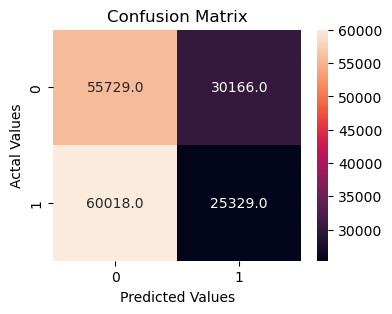

In [88]:
print(classification_report(Y_smote_test, Y_kmeans_pred_SM))

smote_cmKM = confusion_matrix(Y_smote_test, Y_kmeans_pred_SM)
plt.figure(figsize=(4,3))
sn.heatmap(smote_cmKM, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Cat Boost Classifier

In [102]:
cbmodelSM = CatBoostClassifier()
cbmodelSM.fit(X_smote_train, Y_smote_train)

Y_smote_pred_CB = cbmodel.predict(X_smote_test)
CB_smote_score = accuracy_score(Y_smote_test, Y_smote_pred_CB)
print(CB_smote_score)

Learning rate set to 0.167403
0:	learn: 0.5502927	total: 1.17s	remaining: 19m 33s
1:	learn: 0.4682636	total: 2.15s	remaining: 17m 51s
2:	learn: 0.4129663	total: 3.34s	remaining: 18m 30s
3:	learn: 0.3791316	total: 4.29s	remaining: 17m 48s
4:	learn: 0.3512132	total: 4.98s	remaining: 16m 31s
5:	learn: 0.3325935	total: 6.06s	remaining: 16m 43s
6:	learn: 0.3191327	total: 6.84s	remaining: 16m 11s
7:	learn: 0.3097391	total: 7.67s	remaining: 15m 50s
8:	learn: 0.3023276	total: 8.45s	remaining: 15m 30s
9:	learn: 0.2977573	total: 9.19s	remaining: 15m 9s
10:	learn: 0.2921370	total: 9.85s	remaining: 14m 45s
11:	learn: 0.2870838	total: 10.8s	remaining: 14m 48s
12:	learn: 0.2821886	total: 11.6s	remaining: 14m 37s
13:	learn: 0.2787024	total: 12.3s	remaining: 14m 29s
14:	learn: 0.2759627	total: 13.1s	remaining: 14m 20s
15:	learn: 0.2728357	total: 14s	remaining: 14m 20s
16:	learn: 0.2702830	total: 14.7s	remaining: 14m 12s
17:	learn: 0.2688324	total: 15.5s	remaining: 14m 6s
18:	learn: 0.2671855	total: 16

153:	learn: 0.1973821	total: 1m 59s	remaining: 10m 56s
154:	learn: 0.1972340	total: 2m	remaining: 10m 55s
155:	learn: 0.1970846	total: 2m	remaining: 10m 54s
156:	learn: 0.1968992	total: 2m 1s	remaining: 10m 53s
157:	learn: 0.1966978	total: 2m 2s	remaining: 10m 53s
158:	learn: 0.1963924	total: 2m 3s	remaining: 10m 54s
159:	learn: 0.1962773	total: 2m 4s	remaining: 10m 54s
160:	learn: 0.1959599	total: 2m 5s	remaining: 10m 53s
161:	learn: 0.1957907	total: 2m 6s	remaining: 10m 53s
162:	learn: 0.1955501	total: 2m 7s	remaining: 10m 53s
163:	learn: 0.1953613	total: 2m 8s	remaining: 10m 53s
164:	learn: 0.1951174	total: 2m 9s	remaining: 10m 53s
165:	learn: 0.1949626	total: 2m 9s	remaining: 10m 52s
166:	learn: 0.1948252	total: 2m 10s	remaining: 10m 51s
167:	learn: 0.1946128	total: 2m 11s	remaining: 10m 51s
168:	learn: 0.1944265	total: 2m 12s	remaining: 10m 50s
169:	learn: 0.1942316	total: 2m 13s	remaining: 10m 50s
170:	learn: 0.1940544	total: 2m 14s	remaining: 10m 50s
171:	learn: 0.1937787	total:

305:	learn: 0.1755371	total: 4m 6s	remaining: 9m 17s
306:	learn: 0.1754666	total: 4m 6s	remaining: 9m 16s
307:	learn: 0.1753771	total: 4m 7s	remaining: 9m 15s
308:	learn: 0.1752732	total: 4m 8s	remaining: 9m 14s
309:	learn: 0.1751656	total: 4m 8s	remaining: 9m 13s
310:	learn: 0.1750563	total: 4m 9s	remaining: 9m 13s
311:	learn: 0.1749306	total: 4m 10s	remaining: 9m 12s
312:	learn: 0.1748549	total: 4m 11s	remaining: 9m 12s
313:	learn: 0.1747801	total: 4m 12s	remaining: 9m 12s
314:	learn: 0.1747220	total: 4m 13s	remaining: 9m 10s
315:	learn: 0.1745701	total: 4m 14s	remaining: 9m 10s
316:	learn: 0.1744988	total: 4m 15s	remaining: 9m 10s
317:	learn: 0.1744399	total: 4m 15s	remaining: 9m 8s
318:	learn: 0.1743614	total: 4m 16s	remaining: 9m 8s
319:	learn: 0.1741967	total: 4m 17s	remaining: 9m 7s
320:	learn: 0.1741355	total: 4m 18s	remaining: 9m 7s
321:	learn: 0.1740075	total: 4m 19s	remaining: 9m 6s
322:	learn: 0.1739285	total: 4m 20s	remaining: 9m 5s
323:	learn: 0.1738210	total: 4m 21s	rema

458:	learn: 0.1631268	total: 6m 11s	remaining: 7m 17s
459:	learn: 0.1630688	total: 6m 12s	remaining: 7m 17s
460:	learn: 0.1630411	total: 6m 12s	remaining: 7m 15s
461:	learn: 0.1629804	total: 6m 13s	remaining: 7m 15s
462:	learn: 0.1629406	total: 6m 14s	remaining: 7m 14s
463:	learn: 0.1628479	total: 6m 15s	remaining: 7m 13s
464:	learn: 0.1627959	total: 6m 16s	remaining: 7m 12s
465:	learn: 0.1626845	total: 6m 17s	remaining: 7m 12s
466:	learn: 0.1625985	total: 6m 18s	remaining: 7m 11s
467:	learn: 0.1624863	total: 6m 18s	remaining: 7m 10s
468:	learn: 0.1624327	total: 6m 19s	remaining: 7m 9s
469:	learn: 0.1623776	total: 6m 20s	remaining: 7m 8s
470:	learn: 0.1623249	total: 6m 21s	remaining: 7m 8s
471:	learn: 0.1622136	total: 6m 22s	remaining: 7m 7s
472:	learn: 0.1620617	total: 6m 22s	remaining: 7m 6s
473:	learn: 0.1620230	total: 6m 23s	remaining: 7m 5s
474:	learn: 0.1619704	total: 6m 24s	remaining: 7m 4s
475:	learn: 0.1619372	total: 6m 25s	remaining: 7m 3s
476:	learn: 0.1618821	total: 6m 25s	

611:	learn: 0.1544837	total: 8m 15s	remaining: 5m 14s
612:	learn: 0.1544494	total: 8m 16s	remaining: 5m 13s
613:	learn: 0.1543810	total: 8m 16s	remaining: 5m 12s
614:	learn: 0.1543252	total: 8m 17s	remaining: 5m 11s
615:	learn: 0.1542369	total: 8m 18s	remaining: 5m 10s
616:	learn: 0.1542017	total: 8m 19s	remaining: 5m 10s
617:	learn: 0.1541699	total: 8m 20s	remaining: 5m 9s
618:	learn: 0.1541263	total: 8m 21s	remaining: 5m 8s
619:	learn: 0.1540731	total: 8m 22s	remaining: 5m 7s
620:	learn: 0.1539952	total: 8m 22s	remaining: 5m 6s
621:	learn: 0.1539604	total: 8m 23s	remaining: 5m 5s
622:	learn: 0.1539253	total: 8m 23s	remaining: 5m 4s
623:	learn: 0.1538928	total: 8m 24s	remaining: 5m 4s
624:	learn: 0.1538314	total: 8m 25s	remaining: 5m 3s
625:	learn: 0.1537939	total: 8m 26s	remaining: 5m 2s
626:	learn: 0.1537609	total: 8m 27s	remaining: 5m 1s
627:	learn: 0.1537158	total: 8m 28s	remaining: 5m 1s
628:	learn: 0.1536905	total: 8m 29s	remaining: 5m
629:	learn: 0.1536302	total: 8m 30s	remaini

764:	learn: 0.1476037	total: 10m 20s	remaining: 3m 10s
765:	learn: 0.1475741	total: 10m 21s	remaining: 3m 9s
766:	learn: 0.1475401	total: 10m 22s	remaining: 3m 9s
767:	learn: 0.1474954	total: 10m 22s	remaining: 3m 8s
768:	learn: 0.1474430	total: 10m 23s	remaining: 3m 7s
769:	learn: 0.1474138	total: 10m 24s	remaining: 3m 6s
770:	learn: 0.1473384	total: 10m 25s	remaining: 3m 5s
771:	learn: 0.1473086	total: 10m 26s	remaining: 3m 5s
772:	learn: 0.1472610	total: 10m 27s	remaining: 3m 4s
773:	learn: 0.1472357	total: 10m 27s	remaining: 3m 3s
774:	learn: 0.1471973	total: 10m 28s	remaining: 3m 2s
775:	learn: 0.1471773	total: 10m 29s	remaining: 3m 1s
776:	learn: 0.1471139	total: 10m 30s	remaining: 3m
777:	learn: 0.1470914	total: 10m 30s	remaining: 3m
778:	learn: 0.1470591	total: 10m 31s	remaining: 2m 59s
779:	learn: 0.1470195	total: 10m 32s	remaining: 2m 58s
780:	learn: 0.1469808	total: 10m 33s	remaining: 2m 57s
781:	learn: 0.1469546	total: 10m 34s	remaining: 2m 56s
782:	learn: 0.1469348	total: 

915:	learn: 0.1421304	total: 12m 21s	remaining: 1m 7s
916:	learn: 0.1421202	total: 12m 22s	remaining: 1m 7s
917:	learn: 0.1420982	total: 12m 22s	remaining: 1m 6s
918:	learn: 0.1420599	total: 12m 23s	remaining: 1m 5s
919:	learn: 0.1420383	total: 12m 24s	remaining: 1m 4s
920:	learn: 0.1420157	total: 12m 25s	remaining: 1m 3s
921:	learn: 0.1419951	total: 12m 25s	remaining: 1m 3s
922:	learn: 0.1419566	total: 12m 26s	remaining: 1m 2s
923:	learn: 0.1419345	total: 12m 27s	remaining: 1m 1s
924:	learn: 0.1419063	total: 12m 27s	remaining: 1m
925:	learn: 0.1418799	total: 12m 28s	remaining: 59.8s
926:	learn: 0.1418390	total: 12m 29s	remaining: 59s
927:	learn: 0.1418141	total: 12m 30s	remaining: 58.2s
928:	learn: 0.1417810	total: 12m 31s	remaining: 57.4s
929:	learn: 0.1417589	total: 12m 31s	remaining: 56.6s
930:	learn: 0.1417230	total: 12m 32s	remaining: 55.8s
931:	learn: 0.1417012	total: 12m 33s	remaining: 55s
932:	learn: 0.1416832	total: 12m 34s	remaining: 54.2s
933:	learn: 0.1416535	total: 12m 35

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85895
           1       0.98      0.89      0.93     85347

    accuracy                           0.94    171242
   macro avg       0.94      0.94      0.94    171242
weighted avg       0.94      0.94      0.94    171242



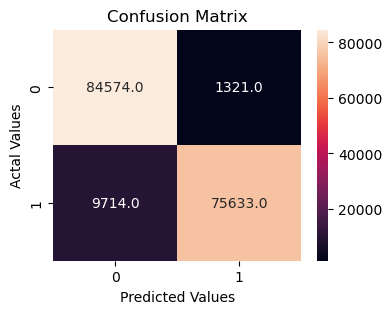

In [101]:
print(classification_report(Y_smote_test, Y_smote_pred_CB))

smote_cmCB = confusion_matrix(Y_smote_test, Y_smote_pred_CB)
plt.figure(figsize=(4,3))
sn.heatmap(smote_cmCB, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### CNN Model on SMOTE data

In [91]:
X_cnn_smote_train = X_smote_train.values.reshape(684964, 300, 1)
X_cnn_smote_train.shape

(684964, 300, 1)

In [92]:
X_cnn_smote_test = X_smote_test.values.reshape(171242, 300, 1)
X_cnn_smote_test.shape

(171242, 300, 1)

In [93]:
cnnmodel_SMOTE = Sequential()
cnnmodel_SMOTE.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_cnn_smote_train.shape[1],1)))
cnnmodel_SMOTE.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu'))
cnnmodel_SMOTE.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation='relu'))
cnnmodel_SMOTE.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnnmodel_SMOTE.add(Dropout(0.5))
cnnmodel_SMOTE.add(Flatten())
cnnmodel_SMOTE.add(Dense(units = 256, activation=LeakyReLU(alpha=0.001)))
cnnmodel_SMOTE.add(Dense(units = 512, activation=LeakyReLU(alpha=0.001)))
cnnmodel_SMOTE.add(Dense(units = 2, activation='softmax'))

cnnmodel_SMOTE.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
cnnmodel_SMOTE.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 300, 32)           128       
                                                                 
 conv1d_7 (Conv1D)           (None, 300, 64)           6208      
                                                                 
 conv1d_8 (Conv1D)           (None, 300, 128)          24704     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 150, 128)         0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 150, 128)          0         
                                                                 
 flatten_2 (Flatten)         (None, 19200)             0         
                                                      

In [94]:
cnnmodel_history_SMOTE = cnnmodel.fit(X_cnn_smote_train, Y_smote_train, epochs=5, batch_size = 10, validation_data = (X_cnn_smote_test, Y_smote_test))

Epoch 1/5
68497/68497 [==============================] - 7281s 106ms/step - loss: 0.2480 - accuracy: 0.9014 - val_loss: 0.2254 - val_accuracy: 0.9090
Epoch 2/5
68497/68497 [==============================] - 8011s 117ms/step - loss: 0.2475 - accuracy: 0.9016 - val_loss: 0.2321 - val_accuracy: 0.9090
Epoch 3/5
68497/68497 [==============================] - 7027s 103ms/step - loss: 0.2483 - accuracy: 0.9013 - val_loss: 0.2291 - val_accuracy: 0.9063
Epoch 4/5
68497/68497 [==============================] - 8307s 121ms/step - loss: 0.2503 - accuracy: 0.9004 - val_loss: 0.2296 - val_accuracy: 0.9078
Epoch 5/5
68497/68497 [==============================] - 7322s 107ms/step - loss: 0.2504 - accuracy: 0.9003 - val_loss: 0.2329 - val_accuracy: 0.9055


5352/5352 [==============================] - 103s 19ms/step
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     85895
           1       0.97      0.85      0.90     85347

    accuracy                           0.91    171242
   macro avg       0.92      0.91      0.91    171242
weighted avg       0.92      0.91      0.91    171242



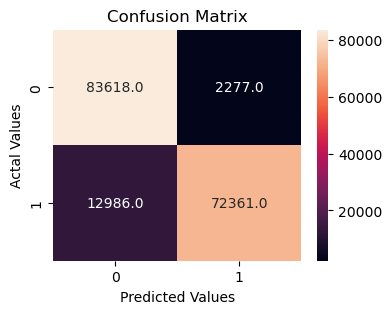

In [99]:
Y_cnn_smote_pred = cnnmodel.predict(X_cnn_smote_test)
Y_cnn_smote_pred = np.argmax(Y_cnn_smote_pred, axis=1)
print(classification_report(Y_smote_test, Y_cnn_smote_pred))

CM_CNN = confusion_matrix(Y_smote_test, Y_cnn_smote_pred)
plt.figure(figsize=(4,3))
sn.heatmap(CM_CNN, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Summary

## Rebalancing using ADASYN

In [103]:
from imblearn.over_sampling import ADASYN

adasyn_oversample = ADASYN(random_state=2)
X_adasyn_oversampled, Y_adasyn_oversampled = adasyn_oversample.fit_resample(X, Y)

In [106]:
X_adasyn_train, X_adasyn_test, Y_adasyn_train, Y_adasyn_test = train_test_split(X_adasyn_oversampled, Y_adasyn_oversampled, test_size=0.2, random_state=42)

print(X_adasyn_train.shape)
print(X_adasyn_test.shape)
print(Y_adasyn_train.shape)
print(Y_adasyn_test.shape)

(687358, 300)
(171840, 300)
(687358,)
(171840,)


### Logistic Regression

In [57]:
logRegClfAD = LogisticRegression(random_state=0)
logRegClfAD.fit(X_adasyn_train, Y_adasyn_train)

Y_adasyn_pred_LR = logRegClfAD.predict(X_adasyn_test)
adasyn_LR_score = accuracy_score(Y_adasyn_test, Y_adasyn_pred_LR)
print(adasyn_LR_score)

0.7598801349935994


              precision    recall  f1-score   support

           0       0.74      0.81      0.77     85733
           1       0.79      0.71      0.75     86127

    accuracy                           0.76    171860
   macro avg       0.76      0.76      0.76    171860
weighted avg       0.76      0.76      0.76    171860



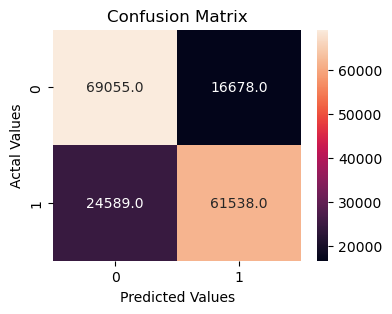

In [90]:
print(classification_report(Y_adasyn_test, Y_adasyn_pred_LR))

adasyn_cmLR = confusion_matrix(Y_adasyn_test, Y_adasyn_pred_LR)
plt.figure(figsize=(4,3))
sn.heatmap(adasyn_cmLR, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### KMeans

1
2
3
4
5
6
7
8
9
10


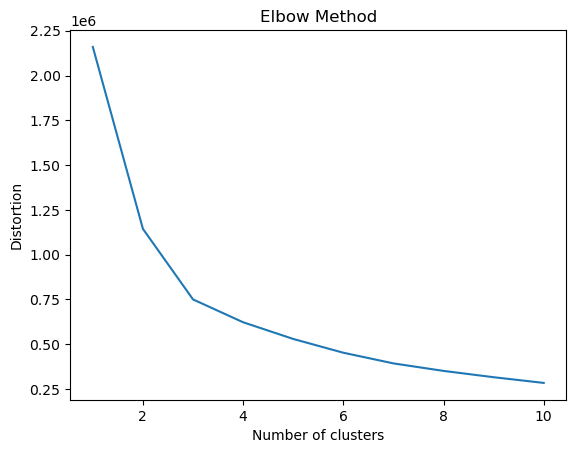

In [58]:
# Elbow Method
distortions = []
for i in range(1, 11):
    print(i)
    kmeansAD = KMeans(n_clusters=i, random_state=42)
    kmeansAD.fit(X_smote_train)
    distortions.append(kmeansAD.inertia_)

plt.plot(range(1, 11), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [91]:
kmeansAD = KMeans(n_clusters=2, random_state=42)
kmeansAD.fit(X_adasyn_train)
Y_kmeans_pred_AD = kmeansAD.predict(X_adasyn_test)
kmeans_adasyn_score = accuracy_score(Y_adasyn_test, Y_kmeans_pred_AD)
print(kmeans_adasyn_score)

0.532986151518678


              precision    recall  f1-score   support

           0       0.52      0.84      0.64     85733
           1       0.59      0.23      0.33     86127

    accuracy                           0.53    171860
   macro avg       0.55      0.53      0.49    171860
weighted avg       0.55      0.53      0.49    171860



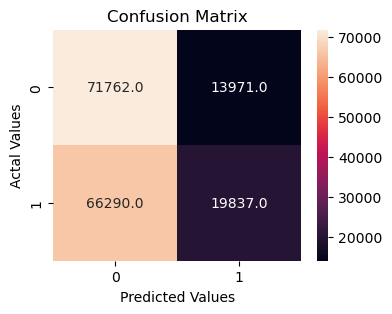

In [92]:
print(classification_report(Y_adasyn_test, Y_kmeans_pred_AD))

adasyn_cmKM = confusion_matrix(Y_adasyn_test, Y_kmeans_pred_AD)
plt.figure(figsize=(4,3))
sn.heatmap(adasyn_cmKM, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Cat Boost Classifier

In [60]:
cbmodelAD = CatBoostClassifier()
cbmodelAD.fit(X_adasyn_train, Y_adasyn_train)

Y_adasyn_pred_CB = cbmodel.predict(X_adasyn_test)
CB_adasyn_score = accuracy_score(Y_adasyn_test, Y_adasyn_pred_CB)
print(CB_adasyn_score)

Learning rate set to 0.167661
0:	learn: 0.6189585	total: 429ms	remaining: 7m 8s
1:	learn: 0.5734111	total: 831ms	remaining: 6m 54s
2:	learn: 0.5395861	total: 1.33s	remaining: 7m 21s
3:	learn: 0.5171478	total: 1.79s	remaining: 7m 25s
4:	learn: 0.5019164	total: 2.23s	remaining: 7m 23s
5:	learn: 0.4894461	total: 2.67s	remaining: 7m 22s
6:	learn: 0.4788844	total: 3.12s	remaining: 7m 22s
7:	learn: 0.4719058	total: 3.45s	remaining: 7m 8s
8:	learn: 0.4657861	total: 3.95s	remaining: 7m 15s
9:	learn: 0.4589053	total: 4.31s	remaining: 7m 6s
10:	learn: 0.4535572	total: 4.78s	remaining: 7m 10s
11:	learn: 0.4497662	total: 5.2s	remaining: 7m 8s
12:	learn: 0.4468278	total: 5.6s	remaining: 7m 5s
13:	learn: 0.4431161	total: 6s	remaining: 7m 2s
14:	learn: 0.4405186	total: 6.32s	remaining: 6m 54s
15:	learn: 0.4384877	total: 6.69s	remaining: 6m 51s
16:	learn: 0.4361905	total: 7.05s	remaining: 6m 47s
17:	learn: 0.4341746	total: 7.43s	remaining: 6m 45s
18:	learn: 0.4313015	total: 7.88s	remaining: 6m 46s
19:

157:	learn: 0.3467642	total: 59.9s	remaining: 5m 18s
158:	learn: 0.3463531	total: 1m	remaining: 5m 19s
159:	learn: 0.3460968	total: 1m	remaining: 5m 19s
160:	learn: 0.3458568	total: 1m 1s	remaining: 5m 18s
161:	learn: 0.3455367	total: 1m 1s	remaining: 5m 18s
162:	learn: 0.3453149	total: 1m 1s	remaining: 5m 18s
163:	learn: 0.3451300	total: 1m 2s	remaining: 5m 17s
164:	learn: 0.3449047	total: 1m 2s	remaining: 5m 17s
165:	learn: 0.3446748	total: 1m 3s	remaining: 5m 16s
166:	learn: 0.3445292	total: 1m 3s	remaining: 5m 16s
167:	learn: 0.3442880	total: 1m 3s	remaining: 5m 15s
168:	learn: 0.3439704	total: 1m 4s	remaining: 5m 15s
169:	learn: 0.3437302	total: 1m 4s	remaining: 5m 14s
170:	learn: 0.3435033	total: 1m 4s	remaining: 5m 14s
171:	learn: 0.3433483	total: 1m 5s	remaining: 5m 13s
172:	learn: 0.3431230	total: 1m 5s	remaining: 5m 12s
173:	learn: 0.3428111	total: 1m 5s	remaining: 5m 12s
174:	learn: 0.3425730	total: 1m 6s	remaining: 5m 12s
175:	learn: 0.3423279	total: 1m 6s	remaining: 5m 11s

311:	learn: 0.3152589	total: 2m 1s	remaining: 4m 28s
312:	learn: 0.3151289	total: 2m 1s	remaining: 4m 27s
313:	learn: 0.3149824	total: 2m 2s	remaining: 4m 27s
314:	learn: 0.3148756	total: 2m 2s	remaining: 4m 26s
315:	learn: 0.3146917	total: 2m 3s	remaining: 4m 26s
316:	learn: 0.3143801	total: 2m 3s	remaining: 4m 26s
317:	learn: 0.3142642	total: 2m 4s	remaining: 4m 26s
318:	learn: 0.3141094	total: 2m 4s	remaining: 4m 25s
319:	learn: 0.3139595	total: 2m 4s	remaining: 4m 25s
320:	learn: 0.3138502	total: 2m 5s	remaining: 4m 24s
321:	learn: 0.3137159	total: 2m 5s	remaining: 4m 24s
322:	learn: 0.3135559	total: 2m 6s	remaining: 4m 24s
323:	learn: 0.3132867	total: 2m 6s	remaining: 4m 24s
324:	learn: 0.3131928	total: 2m 6s	remaining: 4m 23s
325:	learn: 0.3130647	total: 2m 7s	remaining: 4m 23s
326:	learn: 0.3129272	total: 2m 7s	remaining: 4m 22s
327:	learn: 0.3127893	total: 2m 8s	remaining: 4m 22s
328:	learn: 0.3126879	total: 2m 8s	remaining: 4m 22s
329:	learn: 0.3125579	total: 2m 8s	remaining: 

465:	learn: 0.2950743	total: 3m 8s	remaining: 3m 36s
466:	learn: 0.2949761	total: 3m 8s	remaining: 3m 35s
467:	learn: 0.2948937	total: 3m 9s	remaining: 3m 35s
468:	learn: 0.2948303	total: 3m 9s	remaining: 3m 34s
469:	learn: 0.2947405	total: 3m 10s	remaining: 3m 34s
470:	learn: 0.2946831	total: 3m 10s	remaining: 3m 33s
471:	learn: 0.2945721	total: 3m 10s	remaining: 3m 33s
472:	learn: 0.2945001	total: 3m 11s	remaining: 3m 33s
473:	learn: 0.2943888	total: 3m 11s	remaining: 3m 32s
474:	learn: 0.2942164	total: 3m 12s	remaining: 3m 32s
475:	learn: 0.2940581	total: 3m 12s	remaining: 3m 32s
476:	learn: 0.2939711	total: 3m 13s	remaining: 3m 32s
477:	learn: 0.2938824	total: 3m 13s	remaining: 3m 31s
478:	learn: 0.2937686	total: 3m 14s	remaining: 3m 31s
479:	learn: 0.2936752	total: 3m 14s	remaining: 3m 31s
480:	learn: 0.2936031	total: 3m 15s	remaining: 3m 30s
481:	learn: 0.2935156	total: 3m 15s	remaining: 3m 30s
482:	learn: 0.2933162	total: 3m 16s	remaining: 3m 29s
483:	learn: 0.2932026	total: 3m 

619:	learn: 0.2795357	total: 4m 17s	remaining: 2m 37s
620:	learn: 0.2794462	total: 4m 18s	remaining: 2m 37s
621:	learn: 0.2793754	total: 4m 18s	remaining: 2m 37s
622:	learn: 0.2793054	total: 4m 18s	remaining: 2m 36s
623:	learn: 0.2792408	total: 4m 19s	remaining: 2m 36s
624:	learn: 0.2791372	total: 4m 19s	remaining: 2m 35s
625:	learn: 0.2790646	total: 4m 20s	remaining: 2m 35s
626:	learn: 0.2790098	total: 4m 20s	remaining: 2m 35s
627:	learn: 0.2789293	total: 4m 21s	remaining: 2m 34s
628:	learn: 0.2788437	total: 4m 21s	remaining: 2m 34s
629:	learn: 0.2787763	total: 4m 21s	remaining: 2m 33s
630:	learn: 0.2786741	total: 4m 22s	remaining: 2m 33s
631:	learn: 0.2785728	total: 4m 22s	remaining: 2m 33s
632:	learn: 0.2785014	total: 4m 23s	remaining: 2m 32s
633:	learn: 0.2784345	total: 4m 23s	remaining: 2m 32s
634:	learn: 0.2783596	total: 4m 24s	remaining: 2m 31s
635:	learn: 0.2782999	total: 4m 24s	remaining: 2m 31s
636:	learn: 0.2782297	total: 4m 24s	remaining: 2m 30s
637:	learn: 0.2781585	total:

772:	learn: 0.2673045	total: 5m 28s	remaining: 1m 36s
773:	learn: 0.2672424	total: 5m 28s	remaining: 1m 36s
774:	learn: 0.2671311	total: 5m 29s	remaining: 1m 35s
775:	learn: 0.2670496	total: 5m 29s	remaining: 1m 35s
776:	learn: 0.2669887	total: 5m 30s	remaining: 1m 34s
777:	learn: 0.2668865	total: 5m 30s	remaining: 1m 34s
778:	learn: 0.2668266	total: 5m 31s	remaining: 1m 34s
779:	learn: 0.2666993	total: 5m 31s	remaining: 1m 33s
780:	learn: 0.2666095	total: 5m 32s	remaining: 1m 33s
781:	learn: 0.2665460	total: 5m 32s	remaining: 1m 32s
782:	learn: 0.2664753	total: 5m 33s	remaining: 1m 32s
783:	learn: 0.2664088	total: 5m 33s	remaining: 1m 31s
784:	learn: 0.2663411	total: 5m 34s	remaining: 1m 31s
785:	learn: 0.2662644	total: 5m 34s	remaining: 1m 31s
786:	learn: 0.2662210	total: 5m 34s	remaining: 1m 30s
787:	learn: 0.2661344	total: 5m 35s	remaining: 1m 30s
788:	learn: 0.2660269	total: 5m 36s	remaining: 1m 29s
789:	learn: 0.2659688	total: 5m 36s	remaining: 1m 29s
790:	learn: 0.2659118	total:

927:	learn: 0.2571936	total: 6m 37s	remaining: 30.9s
928:	learn: 0.2571337	total: 6m 38s	remaining: 30.4s
929:	learn: 0.2570917	total: 6m 38s	remaining: 30s
930:	learn: 0.2570240	total: 6m 39s	remaining: 29.6s
931:	learn: 0.2569569	total: 6m 39s	remaining: 29.1s
932:	learn: 0.2569100	total: 6m 39s	remaining: 28.7s
933:	learn: 0.2568478	total: 6m 40s	remaining: 28.3s
934:	learn: 0.2568101	total: 6m 40s	remaining: 27.9s
935:	learn: 0.2567613	total: 6m 41s	remaining: 27.4s
936:	learn: 0.2566915	total: 6m 41s	remaining: 27s
937:	learn: 0.2566377	total: 6m 42s	remaining: 26.6s
938:	learn: 0.2565884	total: 6m 42s	remaining: 26.2s
939:	learn: 0.2565046	total: 6m 43s	remaining: 25.7s
940:	learn: 0.2564620	total: 6m 43s	remaining: 25.3s
941:	learn: 0.2564013	total: 6m 43s	remaining: 24.9s
942:	learn: 0.2563270	total: 6m 44s	remaining: 24.4s
943:	learn: 0.2562352	total: 6m 44s	remaining: 24s
944:	learn: 0.2561792	total: 6m 45s	remaining: 23.6s
945:	learn: 0.2561218	total: 6m 45s	remaining: 23.2s

              precision    recall  f1-score   support

           0       0.70      0.98      0.82     85733
           1       0.97      0.57      0.72     86127

    accuracy                           0.78    171860
   macro avg       0.83      0.78      0.77    171860
weighted avg       0.83      0.78      0.77    171860



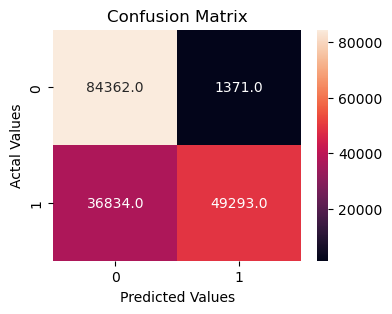

In [93]:
print(classification_report(Y_adasyn_test, Y_adasyn_pred_CB))

adasyn_cmCB = confusion_matrix(Y_adasyn_test, Y_adasyn_pred_CB)
plt.figure(figsize=(4,3))
sn.heatmap(adasyn_cmCB, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### CNN Model on ADASYN Data

In [118]:
X_cnn_adasyn_train = X_adasyn_train.values.reshape(687358, 300, 1)
X_cnn_adasyn_train.shape

(687358, 300, 1)

In [117]:
X_cnn_adasyn_test = X_adasyn_test.values.reshape(171840, 300, 1)
X_cnn_adasyn_test.shape

(171840, 300, 1)

In [119]:
cnnmodel_SMOTE = Sequential()
cnnmodel_SMOTE.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_cnn_adasyn_train.shape[1],1)))
cnnmodel_SMOTE.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu'))
cnnmodel_SMOTE.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation='relu'))
cnnmodel_SMOTE.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnnmodel_SMOTE.add(Dropout(0.5))
cnnmodel_SMOTE.add(Flatten())
cnnmodel_SMOTE.add(Dense(units = 256, activation=LeakyReLU(alpha=0.001)))
cnnmodel_SMOTE.add(Dense(units = 512, activation=LeakyReLU(alpha=0.001)))
cnnmodel_SMOTE.add(Dense(units = 2, activation='sigmoid'))

cnnmodel_SMOTE.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
cnnmodel_SMOTE.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 300, 32)           128       
                                                                 
 conv1d_16 (Conv1D)          (None, 300, 64)           6208      
                                                                 
 conv1d_17 (Conv1D)          (None, 300, 128)          24704     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 150, 128)         0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 150, 128)          0         
                                                                 
 flatten_5 (Flatten)         (None, 19200)             0         
                                                      

In [156]:
cnnmodel_history_ADASYN = cnnmodel.fit(X_cnn_adasyn_train, Y_adasyn_train, epochs=5, batch_size = 100, validation_data = (X_cnn_adasyn_test, Y_adasyn_test))

Epoch 1/2
6874/6874 [==============================] - 837s 121ms/step - loss: 0.4316 - accuracy: 0.7927 - val_loss: 0.3832 - val_accuracy: 0.8213
Epoch 2/2
6874/6874 [==============================] - 855s 124ms/step - loss: 0.3786 - accuracy: 0.8217 - val_loss: 0.3565 - val_accuracy: 0.8307


5370/5370 [==============================] - 85s 16ms/step
[[0.03543919 0.93083686]
 [0.5788231  0.4221247 ]
 [0.3703272  0.60668445]
 [0.9501165  0.03607615]
 [0.3384222  0.6394298 ]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     85949
           1       0.84      0.82      0.83     85891

    accuracy                           0.83    171840
   macro avg       0.83      0.83      0.83    171840
weighted avg       0.83      0.83      0.83    171840



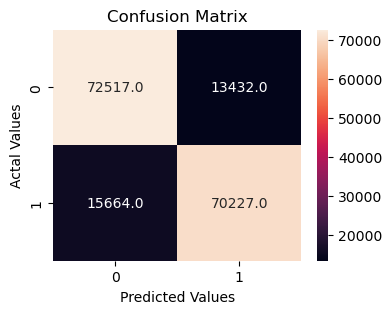

In [159]:
Y_cnn_pred_adasyn = cnnmodel.predict(X_cnn_adasyn_test)
print(Y_cnn_pred_adasyn[:5])
Y_cnn_pred_adasyn = np.argmax(Y_cnn_pred_adasyn, axis=1)
print(classification_report(Y_adasyn_test, Y_cnn_pred_adasyn))

CM_ADASYN = confusion_matrix(Y_adasyn_test, Y_cnn_pred_adasyn)
plt.figure(figsize=(4,3))
sn.heatmap(CM_ADASYN, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

<Axes: xlabel='v10', ylabel='v200'>

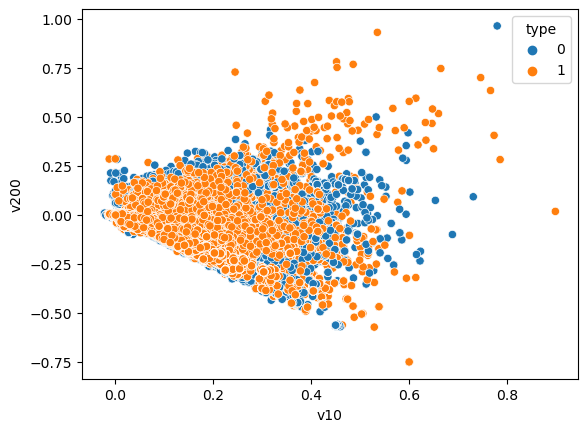

In [153]:
df_example = new_df[['v10', 'v200', 'type']]
df_example.head()
sn.scatterplot(data = df_example, x ='v10', y = 'v200', hue = 'type')

<Axes: xlabel='v10', ylabel='v200'>

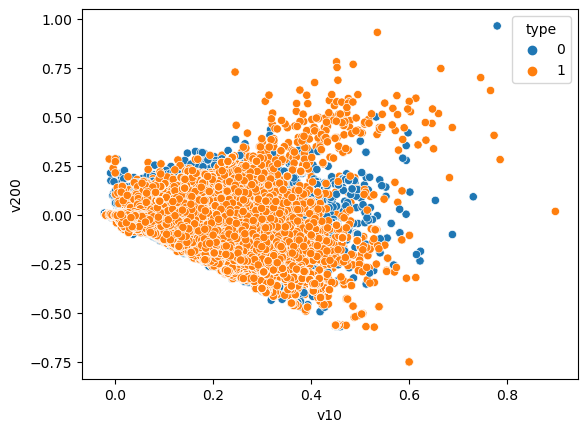

In [154]:
df_example2 = X_smote_oversampled
df_example2['type'] = Y_smote_oversampled
sn.scatterplot(data = df_example2, x ='v10', y = 'v200', hue = 'type')

<Axes: xlabel='v10', ylabel='v200'>

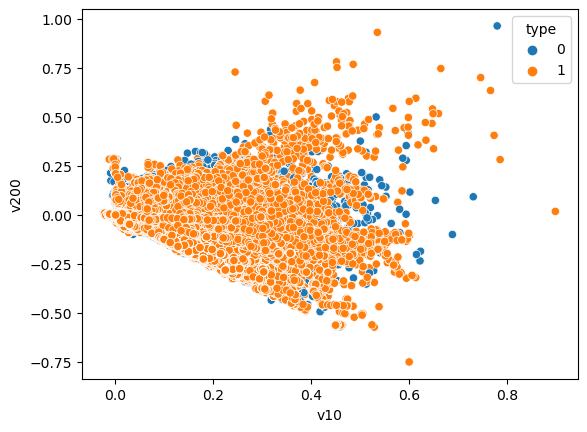

In [155]:
df_example3 = X_adasyn_oversampled
df_example3['type'] = Y_adasyn_oversampled
sn.scatterplot(data = df_example3, x ='v10', y = 'v200', hue = 'type')

## Testing with HTTP Traffic

In [41]:
normal_traffic_train = 'HTTPtraffic/normalTrafficTraining.txt'
normal_traffic_test = 'HTTPtraffic/normalTrafficTest.txt'
anomalous_traffic_test = 'HTTPtraffic/anomalousTrafficTest.txt'

In [42]:
def parseFile(filename):
    fptr = open(filename)
    block = ""

    request_type = []
    urls = []
    hosts = []
    user_agent = []
    pragma = []
    cache_control = []
    accept = []
    accept_encoding = []
    accept_charset = []
    accept_language = []
    cookie = []
    conn = []
    content_type = []
    content_len = []
    
    count = 0

    for line in fptr.readlines():
        req = 'NULL'
        url = 'NULL'
        http = 'NULL'
        uag = 'NULL'
        p = 'NULL'
        cc = 'NULL'
        a = 'NULL'
        ae = 'NULL'
        ac = 'NULL'
        al = 'NULL'
        ckie = 'NULL'
        c = 'NULL'
        cont_type = 'NULL'
        cont_len = 'NULL'
        block += line
        if line == "\n":
            count += 1
            if count == 2:
                count = 0
                block = ""
                continue
            data = block.split("\n")
            for i in range(len(data)):
                d = data[i].strip()
                if d.startswith("GET") or d.startswith("POST") or d.startswith("PUT"):
                    req, url, http = d.split(" ")
                elif d.startswith("User-Agent: "):
                    uag = d[12:]
                elif d.startswith("Pragma: "):
                    p = d[8:]
                elif d.startswith("Cache-Control: "):
                    cc = d[15:]
                elif d.startswith("Accept: "):
                    a = d[8:]
                elif d.startswith("Accept-Encoding: "):
                    ae = d[17:]
                elif d.startswith("Accept-Charset: "):
                    ac = d[16:]
                elif d.startswith("Accept-Language"):
                    al = d[17:]
                elif d.startswith("Cookie: "):
                    ckie = d[8:]
                elif d.startswith("Connection: "):
                    c = d[12:]
                elif d.startswith("Content-Type: "):
                    cont_type = d[14:]
                elif d.startswith('Content-Length: '):
                    cont_len = d[16:]
            
            request_type.append(req)
            urls.append(req + " " + url)
            host = data[8][6:]
            
            hosts.append(host)
            user_agent.append(uag)
            pragma.append(p)
            cache_control.append(cc)
            accept.append(a)
            accept_encoding.append(ae)
            accept_charset.append(ac)
            accept_language.append(al)
            cookie.append(ckie)
            conn.append(c)
            content_type.append(cont_type)
            content_len.append(cont_len)
            
            block = ""
            
    http_traffic_data = pd.DataFrame(data=list(zip(request_type, urls, hosts, user_agent, pragma, cache_control, accept, accept_encoding, accept_charset, accept_language, cookie, conn, content_type, content_len)), columns=["method", "path", "host", "user_agent", "pragma", "cache_control", "accept", "accept_enc", "accept_char", "accept_lang", "cookie", "conn", "content_type", "content_len"])
    
    return http_traffic_data

In [43]:
df_normal_traffic = parseFile(normal_traffic_train)
df_normal_traffic

,method,path,host,user_agent,pragma,cache_control,accept,accept_enc,accept_char,accept_lang,cookie,conn,content_type,content_len
0,GET,GET http://localhost:8080/tienda1/index.jsp,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,close,NULL,NULL
1,GET,GET http://localhost:8080/tienda1/publico/anad...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,close,NULL,NULL
2,POST,POST http://localhost:8080/tienda1/publico/ana...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=933185092E0B668B90676E0A2B0767AF,close,application/x-www-form-urlencoded,68
3,GET,GET http://localhost:8080/tienda1/publico/aute...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,close,NULL,NULL
4,POST,POST http://localhost:8080/tienda1/publico/aut...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,close,application/x-www-form-urlencoded,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,GET,GET http://localhost:8080/tienda1/imagenes/2.gif,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=6D4D8AF3FC2C291CDBA2E1B39A266617,close,NULL,NULL
35996,GET,GET http://localhost:8080/tienda1/imagenes/3.gif,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=3AD01D093A41EE8156B8549E5CB5247A,close,NULL,NULL
35997,GET,GET http://localhost:8080/tienda1/imagenes/cme...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=DF85B4F0BDAB8579850FB4858032811D,close,NULL,NULL
35998,GET,GET http://localhost:8080/tienda1/imagenes/log...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=AC79ED01AD6C72CD0CAFA94171438750,close,NULL,NULL


In [44]:
df_normal_traffic["label"] = 0
df_normal_traffic

,method,path,host,user_agent,pragma,cache_control,accept,accept_enc,accept_char,accept_lang,cookie,conn,content_type,content_len,label
0,GET,GET http://localhost:8080/tienda1/index.jsp,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,close,NULL,NULL,0
1,GET,GET http://localhost:8080/tienda1/publico/anad...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,close,NULL,NULL,0
2,POST,POST http://localhost:8080/tienda1/publico/ana...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=933185092E0B668B90676E0A2B0767AF,close,application/x-www-form-urlencoded,68,0
3,GET,GET http://localhost:8080/tienda1/publico/aute...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,close,NULL,NULL,0
4,POST,POST http://localhost:8080/tienda1/publico/aut...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,close,application/x-www-form-urlencoded,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,GET,GET http://localhost:8080/tienda1/imagenes/2.gif,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=6D4D8AF3FC2C291CDBA2E1B39A266617,close,NULL,NULL,0
35996,GET,GET http://localhost:8080/tienda1/imagenes/3.gif,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=3AD01D093A41EE8156B8549E5CB5247A,close,NULL,NULL,0
35997,GET,GET http://localhost:8080/tienda1/imagenes/cme...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=DF85B4F0BDAB8579850FB4858032811D,close,NULL,NULL,0
35998,GET,GET http://localhost:8080/tienda1/imagenes/log...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=AC79ED01AD6C72CD0CAFA94171438750,close,NULL,NULL,0


In [45]:
df_anomalous_traffic = parseFile(anomalous_traffic_test)
df_anomalous_traffic["label"] = 1
df_anomalous_traffic

,method,path,host,user_agent,pragma,cache_control,accept,accept_enc,accept_char,accept_lang,cookie,conn,content_type,content_len,label
0,GET,GET http://localhost:8080/tienda1/publico/anad...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,close,NULL,NULL,1
1,POST,POST http://localhost:8080/tienda1/publico/ana...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=AE29AEEBDE479D5E1A18B4108C8E3CE0,close,application/x-www-form-urlencoded,146,1
2,GET,GET http://localhost:8080/tienda1/publico/anad...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=F563B5262843F12ECAE41815ABDEEA54,close,NULL,NULL,1
3,POST,POST http://localhost:8080/tienda1/publico/ana...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=3B654D6DF7F1466EE80D7F756B00E5D1,close,application/x-www-form-urlencoded,77,1
4,GET,GET http://localhost:8080/asf-logo-wide.gif~,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=51A7470173188BBB993947F2283059E4,close,NULL,NULL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25060,GET,GET http://localhost:8080/tienda1/miembros/edi...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=62216ADBBD9B91E17CA9AFEDCCC36275,close,NULL,NULL,1
25061,POST,POST http://localhost:8080/tienda1/miembros/ed...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=2317F5C0B1B7FAD18EB425E98DB102A3,close,application/x-www-form-urlencoded,255,1
25062,GET,GET http://localhost:8080/tienda1/miembros/edi...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=7F0BA54A88B849EF752006D388E15CDD,close,NULL,NULL,1
25063,GET,GET http://localhost:8080/tienda1/imagenes/3.gif/,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=FB018FFB06011CFABD60D8E8AD58CA21,close,NULL,NULL,1


In [46]:
df_all_requests = pd.concat([df_normal_traffic, df_anomalous_traffic], ignore_index=True, sort='False')
df_all_requests

,accept,accept_char,accept_enc,accept_lang,cache_control,conn,content_len,content_type,cookie,host,label,method,path,pragma,user_agent
0,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,localhost:8080,0,GET,GET http://localhost:8080/tienda1/index.jsp,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
1,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,localhost:8080,0,GET,GET http://localhost:8080/tienda1/publico/anad...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
2,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,68,application/x-www-form-urlencoded,JSESSIONID=933185092E0B668B90676E0A2B0767AF,localhost:8080,0,POST,POST http://localhost:8080/tienda1/publico/ana...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
3,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,localhost:8080,0,GET,GET http://localhost:8080/tienda1/publico/aute...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
4,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,63,application/x-www-form-urlencoded,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,localhost:8080,0,POST,POST http://localhost:8080/tienda1/publico/aut...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61060,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=62216ADBBD9B91E17CA9AFEDCCC36275,localhost:8080,1,GET,GET http://localhost:8080/tienda1/miembros/edi...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
61061,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,255,application/x-www-form-urlencoded,JSESSIONID=2317F5C0B1B7FAD18EB425E98DB102A3,localhost:8080,1,POST,POST http://localhost:8080/tienda1/miembros/ed...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
61062,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=7F0BA54A88B849EF752006D388E15CDD,localhost:8080,1,GET,GET http://localhost:8080/tienda1/miembros/edi...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
61063,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=FB018FFB06011CFABD60D8E8AD58CA21,localhost:8080,1,GET,GET http://localhost:8080/tienda1/imagenes/3.gif/,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...


In [47]:
df_all_requests['path'] = df_all_requests['path'].apply(lambda x : str(x))
df_all_requests['url_tokens'] = df_all_requests['path'].apply(lambda x: getTokens(x))

df_all_requests.head()

,accept,accept_char,accept_enc,accept_lang,cache_control,conn,content_len,content_type,cookie,host,label,method,path,pragma,user_agent,url_tokens
0,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,localhost:8080,0,GET,GET http://localhost:8080/tienda1/index.jsp,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,"[get, http, localhost, 8080, tienda1, index, jsp]"
1,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,localhost:8080,0,GET,GET http://localhost:8080/tienda1/publico/anad...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,"[get, http, localhost, 8080, tienda1, publico,..."
2,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,68,application/x-www-form-urlencoded,JSESSIONID=933185092E0B668B90676E0A2B0767AF,localhost:8080,0,POST,POST http://localhost:8080/tienda1/publico/ana...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,"[post, http, localhost, 8080, tienda1, publico..."
3,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,localhost:8080,0,GET,GET http://localhost:8080/tienda1/publico/aute...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,"[get, http, localhost, 8080, tienda1, publico,..."
4,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,63,application/x-www-form-urlencoded,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,localhost:8080,0,POST,POST http://localhost:8080/tienda1/publico/aut...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,"[post, http, localhost, 8080, tienda1, publico..."


In [49]:
df_all_requests = df_all_requests[['path', 'label', 'url_tokens']]
df_all_requests.head()

,path,label,url_tokens
0,GET http://localhost:8080/tienda1/index.jsp,0,"[get, http, localhost, 8080, tienda1, index, jsp]"
1,GET http://localhost:8080/tienda1/publico/anad...,0,"[get, http, localhost, 8080, tienda1, publico,..."
2,POST http://localhost:8080/tienda1/publico/ana...,0,"[post, http, localhost, 8080, tienda1, publico..."
3,GET http://localhost:8080/tienda1/publico/aute...,0,"[get, http, localhost, 8080, tienda1, publico,..."
4,POST http://localhost:8080/tienda1/publico/aut...,0,"[post, http, localhost, 8080, tienda1, publico..."


In [61]:
def create_paragraph_vectors(tokens):
    temp = []
    for i in range(300):
        sum = 0
        for token in tokens:
            try:
                sum += tfidf_weighted_vector[token][i]
            except KeyError as e:
                v = np.random.uniform(0,1,300)
                sum += v[i]
        temp.append(sum/len(tokens))
    paragraph_vector = np.asarray(temp, dtype=np.float32)
    return paragraph_vector

tokens = ['get', 'http', 'localhost', '8080', 'tienda1', 'index', 'jsp']
res = create_paragraph_vectors(tokens)
print(res.shape)

example_url = ['https', 'www', 'google', 'com']
res = create_paragraph_vectors(example_url)
print(res.shape)

(300,)
(300,)


In [62]:
df_all_requests['paragraph_vector'] = df_all_requests['url_tokens'].apply(lambda x: create_paragraph_vectors(x))
df_all_requests.head()

,path,label,url_tokens,paragraph_vector
0,GET http://localhost:8080/tienda1/index.jsp,0,"[get, http, localhost, 8080, tienda1, index, jsp]","[0.06985906, 0.12806763, 0.08419237, 0.0709949..."
1,GET http://localhost:8080/tienda1/publico/anad...,0,"[get, http, localhost, 8080, tienda1, publico,...","[0.1289975, 0.1687376, 0.18640302, 0.20249204,..."
2,POST http://localhost:8080/tienda1/publico/ana...,0,"[post, http, localhost, 8080, tienda1, publico...","[0.06097622, 0.10046184, 0.15456794, 0.1123883..."
3,GET http://localhost:8080/tienda1/publico/aute...,0,"[get, http, localhost, 8080, tienda1, publico,...","[0.053147245, 0.048466947, 0.11287935, 0.12599..."
4,POST http://localhost:8080/tienda1/publico/aut...,0,"[post, http, localhost, 8080, tienda1, publico...","[0.061656673, 0.046855334, 0.08513522, 0.13477..."


In [63]:
import warnings
warnings.filterwarnings('ignore')

df_all_requests[cols] = pd.DataFrame(df_all_requests['paragraph_vector'].to_list(), index=df_all_requests.index)
df_all_requests.head()

,path,label,url_tokens,paragraph_vector,v0,v1,v2,v3,v4,v5,...,v290,v291,v292,v293,v294,v295,v296,v297,v298,v299
0,GET http://localhost:8080/tienda1/index.jsp,0,"[get, http, localhost, 8080, tienda1, index, jsp]","[0.06985906, 0.12806763, 0.08419237, 0.0709949...",0.069859,0.128068,0.084192,0.070995,0.181002,0.028764,...,0.132669,0.234356,-0.000561,0.258059,0.113941,0.121317,0.339092,-0.014289,0.265761,0.080188
1,GET http://localhost:8080/tienda1/publico/anad...,0,"[get, http, localhost, 8080, tienda1, publico,...","[0.1289975, 0.1687376, 0.18640302, 0.20249204,...",0.128998,0.168738,0.186403,0.202492,0.176522,0.122618,...,0.181753,0.138358,0.141891,0.183570,0.054712,0.181424,0.196288,0.108575,0.240766,0.140877
2,POST http://localhost:8080/tienda1/publico/ana...,0,"[post, http, localhost, 8080, tienda1, publico...","[0.06097622, 0.10046184, 0.15456794, 0.1123883...",0.060976,0.100462,0.154568,0.112388,0.138459,0.033696,...,0.099829,0.131268,0.056649,0.157806,0.053653,0.131181,0.219003,0.052271,0.166269,0.095573
3,GET http://localhost:8080/tienda1/publico/aute...,0,"[get, http, localhost, 8080, tienda1, publico,...","[0.053147245, 0.048466947, 0.11287935, 0.12599...",0.053147,0.048467,0.112879,0.125996,0.159759,0.127972,...,0.122406,0.149329,0.080119,0.134173,0.065690,0.151649,0.134403,0.049200,0.087529,0.055255
4,POST http://localhost:8080/tienda1/publico/aut...,0,"[post, http, localhost, 8080, tienda1, publico...","[0.061656673, 0.046855334, 0.08513522, 0.13477...",0.061657,0.046855,0.085135,0.134770,0.165023,0.097685,...,0.141932,0.086564,-0.006608,0.187531,0.085881,0.089115,0.140918,-0.014672,0.174974,0.134737


In [64]:
http_X = df_all_requests.iloc[:, 4:]
http_Y = df_all_requests['label']

In [65]:
http_X.shape

(61065, 300)

In [66]:
http_Y.shape

(61065,)

In [67]:
from sklearn.model_selection import train_test_split

http_X_train, http_X_test, http_Y_train, http_Y_test = train_test_split(http_X, http_Y, test_size=0.2, random_state=42)

print(http_X_train.shape)
print(http_X_test.shape)
print(http_Y_train.shape)
print(http_Y_test.shape)

(48852, 300)
(12213, 300)
(48852,)
(12213,)


### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logRegClfHTTP = LogisticRegression(random_state=0)
logRegClfHTTP.fit(http_X_train, http_Y_train)

http_Y_pred = logRegClfHTTP.predict(http_X_test)
score = accuracy_score(http_Y_test, http_Y_pred)
print(score)
print(classification_report(http_Y_test, http_Y_pred))

0.6294112830590355
              precision    recall  f1-score   support

           0       0.64      0.84      0.73      7148
           1       0.60      0.33      0.42      5065

    accuracy                           0.63     12213
   macro avg       0.62      0.59      0.58     12213
weighted avg       0.62      0.63      0.60     12213



In [70]:
http_Y_pred = logRegClf.predict(http_X_test)
score = accuracy_score(http_Y_test, http_Y_pred)
print(score)
print(classification_report(http_Y_test, http_Y_pred))

0.43609268811921725
              precision    recall  f1-score   support

           0       0.53      0.28      0.37      7148
           1       0.39      0.65      0.49      5065

    accuracy                           0.44     12213
   macro avg       0.46      0.47      0.43     12213
weighted avg       0.48      0.44      0.42     12213



### Cat Boost

In [71]:
from catboost import CatBoostClassifier

cbmodelHTTP = CatBoostClassifier()
cbmodelHTTP.fit(http_X_train, http_Y_train)

http_Y_cb_pred = cbmodelHTTP.predict(http_X_test)

Learning rate set to 0.054211
0:	learn: 0.6863941	total: 352ms	remaining: 5m 51s
1:	learn: 0.6800239	total: 509ms	remaining: 4m 14s
2:	learn: 0.6744370	total: 663ms	remaining: 3m 40s
3:	learn: 0.6697562	total: 812ms	remaining: 3m 22s
4:	learn: 0.6652136	total: 947ms	remaining: 3m 8s
5:	learn: 0.6609275	total: 1.1s	remaining: 3m 2s
6:	learn: 0.6572875	total: 1.25s	remaining: 2m 57s
7:	learn: 0.6539904	total: 1.41s	remaining: 2m 55s
8:	learn: 0.6511726	total: 1.56s	remaining: 2m 52s
9:	learn: 0.6483114	total: 1.71s	remaining: 2m 49s
10:	learn: 0.6456019	total: 1.85s	remaining: 2m 46s
11:	learn: 0.6434641	total: 1.99s	remaining: 2m 43s
12:	learn: 0.6416483	total: 2.15s	remaining: 2m 42s
13:	learn: 0.6397867	total: 2.31s	remaining: 2m 42s
14:	learn: 0.6379618	total: 2.48s	remaining: 2m 43s
15:	learn: 0.6361299	total: 2.65s	remaining: 2m 43s
16:	learn: 0.6348558	total: 2.82s	remaining: 2m 43s
17:	learn: 0.6334731	total: 2.98s	remaining: 2m 42s
18:	learn: 0.6318855	total: 3.14s	remaining: 2m

158:	learn: 0.5848998	total: 24.2s	remaining: 2m 8s
159:	learn: 0.5847369	total: 24.4s	remaining: 2m 8s
160:	learn: 0.5845761	total: 24.5s	remaining: 2m 7s
161:	learn: 0.5843758	total: 24.7s	remaining: 2m 7s
162:	learn: 0.5841838	total: 24.8s	remaining: 2m 7s
163:	learn: 0.5840357	total: 25s	remaining: 2m 7s
164:	learn: 0.5838847	total: 25.1s	remaining: 2m 7s
165:	learn: 0.5837095	total: 25.3s	remaining: 2m 7s
166:	learn: 0.5835477	total: 25.5s	remaining: 2m 7s
167:	learn: 0.5833881	total: 25.6s	remaining: 2m 6s
168:	learn: 0.5832239	total: 25.8s	remaining: 2m 6s
169:	learn: 0.5830792	total: 26s	remaining: 2m 6s
170:	learn: 0.5829077	total: 26.1s	remaining: 2m 6s
171:	learn: 0.5827744	total: 26.3s	remaining: 2m 6s
172:	learn: 0.5826325	total: 26.5s	remaining: 2m 6s
173:	learn: 0.5825005	total: 26.6s	remaining: 2m 6s
174:	learn: 0.5823457	total: 26.8s	remaining: 2m 6s
175:	learn: 0.5821693	total: 27s	remaining: 2m 6s
176:	learn: 0.5820280	total: 27.1s	remaining: 2m 6s
177:	learn: 0.5819

316:	learn: 0.5559592	total: 49.5s	remaining: 1m 46s
317:	learn: 0.5557670	total: 49.7s	remaining: 1m 46s
318:	learn: 0.5555891	total: 49.8s	remaining: 1m 46s
319:	learn: 0.5554022	total: 50s	remaining: 1m 46s
320:	learn: 0.5552498	total: 50.1s	remaining: 1m 46s
321:	learn: 0.5550835	total: 50.3s	remaining: 1m 45s
322:	learn: 0.5548865	total: 50.4s	remaining: 1m 45s
323:	learn: 0.5546923	total: 50.6s	remaining: 1m 45s
324:	learn: 0.5544956	total: 50.8s	remaining: 1m 45s
325:	learn: 0.5542981	total: 50.9s	remaining: 1m 45s
326:	learn: 0.5541502	total: 51s	remaining: 1m 45s
327:	learn: 0.5539471	total: 51.2s	remaining: 1m 44s
328:	learn: 0.5537821	total: 51.3s	remaining: 1m 44s
329:	learn: 0.5536019	total: 51.5s	remaining: 1m 44s
330:	learn: 0.5534097	total: 51.6s	remaining: 1m 44s
331:	learn: 0.5532548	total: 51.8s	remaining: 1m 44s
332:	learn: 0.5531113	total: 51.9s	remaining: 1m 43s
333:	learn: 0.5529556	total: 52.1s	remaining: 1m 43s
334:	learn: 0.5527895	total: 52.2s	remaining: 1m 4

472:	learn: 0.5299855	total: 1m 14s	remaining: 1m 22s
473:	learn: 0.5298347	total: 1m 14s	remaining: 1m 22s
474:	learn: 0.5296815	total: 1m 14s	remaining: 1m 22s
475:	learn: 0.5294912	total: 1m 14s	remaining: 1m 22s
476:	learn: 0.5293321	total: 1m 15s	remaining: 1m 22s
477:	learn: 0.5291904	total: 1m 15s	remaining: 1m 22s
478:	learn: 0.5289952	total: 1m 15s	remaining: 1m 21s
479:	learn: 0.5288540	total: 1m 15s	remaining: 1m 21s
480:	learn: 0.5286741	total: 1m 15s	remaining: 1m 21s
481:	learn: 0.5285041	total: 1m 15s	remaining: 1m 21s
482:	learn: 0.5283479	total: 1m 16s	remaining: 1m 21s
483:	learn: 0.5281917	total: 1m 16s	remaining: 1m 21s
484:	learn: 0.5280674	total: 1m 16s	remaining: 1m 21s
485:	learn: 0.5279260	total: 1m 16s	remaining: 1m 20s
486:	learn: 0.5277769	total: 1m 16s	remaining: 1m 20s
487:	learn: 0.5276396	total: 1m 16s	remaining: 1m 20s
488:	learn: 0.5275314	total: 1m 17s	remaining: 1m 20s
489:	learn: 0.5273640	total: 1m 17s	remaining: 1m 20s
490:	learn: 0.5272549	total:

627:	learn: 0.5072601	total: 1m 40s	remaining: 59.4s
628:	learn: 0.5071270	total: 1m 40s	remaining: 59.2s
629:	learn: 0.5070032	total: 1m 40s	remaining: 59.1s
630:	learn: 0.5068457	total: 1m 40s	remaining: 59s
631:	learn: 0.5066678	total: 1m 41s	remaining: 58.8s
632:	learn: 0.5065066	total: 1m 41s	remaining: 58.7s
633:	learn: 0.5063815	total: 1m 41s	remaining: 58.5s
634:	learn: 0.5062614	total: 1m 41s	remaining: 58.3s
635:	learn: 0.5061080	total: 1m 41s	remaining: 58.2s
636:	learn: 0.5059911	total: 1m 41s	remaining: 58s
637:	learn: 0.5058625	total: 1m 41s	remaining: 57.8s
638:	learn: 0.5057215	total: 1m 42s	remaining: 57.7s
639:	learn: 0.5056000	total: 1m 42s	remaining: 57.5s
640:	learn: 0.5054697	total: 1m 42s	remaining: 57.4s
641:	learn: 0.5053445	total: 1m 42s	remaining: 57.2s
642:	learn: 0.5052135	total: 1m 42s	remaining: 57s
643:	learn: 0.5050744	total: 1m 42s	remaining: 56.9s
644:	learn: 0.5049381	total: 1m 43s	remaining: 56.7s
645:	learn: 0.5048100	total: 1m 43s	remaining: 56.6s

785:	learn: 0.4856748	total: 2m 6s	remaining: 34.4s
786:	learn: 0.4855093	total: 2m 6s	remaining: 34.3s
787:	learn: 0.4853649	total: 2m 6s	remaining: 34.1s
788:	learn: 0.4852478	total: 2m 6s	remaining: 33.9s
789:	learn: 0.4851088	total: 2m 7s	remaining: 33.8s
790:	learn: 0.4849539	total: 2m 7s	remaining: 33.6s
791:	learn: 0.4848355	total: 2m 7s	remaining: 33.4s
792:	learn: 0.4847407	total: 2m 7s	remaining: 33.3s
793:	learn: 0.4846198	total: 2m 7s	remaining: 33.1s
794:	learn: 0.4844702	total: 2m 7s	remaining: 33s
795:	learn: 0.4843422	total: 2m 7s	remaining: 32.8s
796:	learn: 0.4841720	total: 2m 8s	remaining: 32.6s
797:	learn: 0.4840678	total: 2m 8s	remaining: 32.5s
798:	learn: 0.4839410	total: 2m 8s	remaining: 32.3s
799:	learn: 0.4838388	total: 2m 8s	remaining: 32.2s
800:	learn: 0.4837216	total: 2m 8s	remaining: 32s
801:	learn: 0.4835967	total: 2m 8s	remaining: 31.8s
802:	learn: 0.4834574	total: 2m 9s	remaining: 31.7s
803:	learn: 0.4833470	total: 2m 9s	remaining: 31.5s
804:	learn: 0.48

941:	learn: 0.4657796	total: 2m 31s	remaining: 9.35s
942:	learn: 0.4656650	total: 2m 31s	remaining: 9.19s
943:	learn: 0.4655179	total: 2m 32s	remaining: 9.03s
944:	learn: 0.4653923	total: 2m 32s	remaining: 8.86s
945:	learn: 0.4652479	total: 2m 32s	remaining: 8.7s
946:	learn: 0.4651291	total: 2m 32s	remaining: 8.54s
947:	learn: 0.4650403	total: 2m 32s	remaining: 8.38s
948:	learn: 0.4649279	total: 2m 32s	remaining: 8.22s
949:	learn: 0.4647725	total: 2m 33s	remaining: 8.06s
950:	learn: 0.4646632	total: 2m 33s	remaining: 7.9s
951:	learn: 0.4645418	total: 2m 33s	remaining: 7.74s
952:	learn: 0.4644704	total: 2m 33s	remaining: 7.57s
953:	learn: 0.4643650	total: 2m 33s	remaining: 7.41s
954:	learn: 0.4642748	total: 2m 33s	remaining: 7.25s
955:	learn: 0.4641644	total: 2m 34s	remaining: 7.09s
956:	learn: 0.4640101	total: 2m 34s	remaining: 6.93s
957:	learn: 0.4638852	total: 2m 34s	remaining: 6.77s
958:	learn: 0.4637632	total: 2m 34s	remaining: 6.61s
959:	learn: 0.4636275	total: 2m 34s	remaining: 6

NameError: name 'Y_cb_pred' is not defined

In [72]:
http_cbscore = accuracy_score(http_Y_test, http_Y_cb_pred)
print(http_cbscore)
print(classification_report(http_Y_test, http_Y_cb_pred))

0.67984934086629
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      7148
           1       0.68      0.43      0.53      5065

    accuracy                           0.68     12213
   macro avg       0.68      0.64      0.64     12213
weighted avg       0.68      0.68      0.66     12213

